## TITLE:  Unveiling the Drivers of Customer Churn: An Analytical Journey to Improve Retention

# Intro


## General

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.


#####  HYPOTHESIS: 

1. The likelihood of a customer leaving the organization is influenced by their contract type

NULL: Customers on 2-year contracts are less likely to churn 

Alternate: Customers on 2-year contracts are more likely to churn 




##### BUSINESS QUESTIONS:  

###### Demographic Factors:

- What is the gender distribution of customers?
- What is the distribution of customers based on their senior citizen status?
- What is the distribution of customers based on their partnership status?
- What is the distribution of customers based on their dependents status?

###### Services Availed:

- What is the distribution of customers based on their phone service status?
- What is the distribution of customers based on their multiple lines status?
- What is the distribution of customers based on their internet service provider?
- What is the distribution of customers based on their online security status?
- What is the distribution of customers based on their online backup status?
- What is the distribution of customers based on their device protection status?
- What is the distribution of customers based on their tech support status?
- What is the distribution of customers based on their streaming TV status?
- What is the distribution of customers based on their streaming movies status?

###### Contract Terms:

- What is the distribution of customers based on their contract term?
- Is there a relationship between contract term and customer churn?

###### Payment Method:

- What is the distribution of customers based on their payment method?
- Is there a relationship between payment method and customer churn?

###### Monthly Charges:

- Is there a relationship between monthly charges and customer churn?

###### churn attribute:
- Which gender has a higher churn rate?
- Is there a difference in churn rate between senior citizens and non-senior citizens?
- How does the churn rate vary by internet service provider?
- Do customers with phone service only have a higher or lower churn rate compared to those with additional services like internet or TV streaming?
- Is there a difference in churn rate based on payment method?
- Do customers who have multiple lines have a higher or lower churn rate compared to those with single lines?
- What is the churn rate for customers who have paperless billing vs. those who do not?

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np 

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn import preprocessing

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os
import warnings
warnings.filterwarnings('ignore')

#display all columns and rows 
pd.set_option('display.max_columns', None)


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# For CSV, use pandas.read_csv

churn_data = pd.read_csv("Telco-Customer-Churn.csv")

# Exploratory Data Analysis: EDA

the goal of manual EDA is to gain a deeper understanding of the data and identify potential problems and opportunities for analysis. By combining basic statistics, visualization techniques, and common sense, you can get a good sense of the data and start developing insights and hypotheses for further analysis.

In [4]:
churn_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [5]:
churn_data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The following describes the columns present in the data.

- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)

In [7]:
churn_data.shape

(7043, 21)

Our data contains 7043 customers with 21 columns containing various customer information that can be summarized as customer’s demographic, account, and subscription information. The "churn" column which is the column we want to predict contains information on whether the customer churned or not.

The next step is to perform some data preprocessing which involes the following steps

- Check the data types: You can use the .dtypes attribute to check the data types of each column in the DataFrame. Ensure that each column has the correct data type, and if not, convert it to the appropriate type using the .astype() method.

- Check for missing values: You can use the .isnull() method to check for missing values in the DataFrame. If there are missing values, you may choose to either drop the rows with missing values or impute the missing values with some other value.

- Check for duplicate rows: You can use the .duplicated() method to check for duplicate rows in the DataFrame. If there are duplicate rows, you may choose to drop them using the .drop_duplicates() method.

- Check for outliers: You can use various statistical methods to identify outliers in the dataset. If there are outliers, you may choose to remove them or transform the data in some way to mitigate their impact.

- Perform descriptive statistics: You can use the .describe() method to get summary statistics for each column in the DataFrame. This can help you get a better understanding of the range and distribution of the data.

In [8]:
# Check for missing values
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data has no missing values. However, the TotalCharges column contains empty spaces.

In [9]:
# Check the data types of each column
print(churn_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [10]:
# Coerce the conversion of TotalCharges column to float
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [11]:
# Check the data types of each column
print(churn_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [12]:
# Check for missing values in churn_data
missing_values = churn_data.isna().sum()
print(missing_values)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [13]:
# Handle NaN values in the TotalCharges column
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].mean())

However, the TotalCharges column contains 11 missing values which used to be empty strings. We assume those rows contain information for new customers who have not been billed yet since their tenure is will be valued at the mean of the total charges. We therefore change the empty spaces with mean value of the total charges.

In [14]:
# Check for missing values in churn_data
missing_values = churn_data.isna().sum()
print(missing_values)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [15]:
# Check for duplicate rows in churn_data
duplicate_rows = churn_data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())


Number of duplicate rows: 0


In [16]:
# Get summary statistics for numeric columns in churn_data
summary_stats = churn_data.describe()
print(summary_stats)


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


#Major observations:

1. 7043 records are available for analysis 
2. 8684.800000 is the maximum Total Charge 
3. 18.800000 is the minimum Total Charge 
4. 118.750000 is the maximum Monthly charge 
5. 18.250000 is the minimum Monthly charge 

In [17]:
# Code here

### Univatiate Analysis

In [18]:
churn_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [19]:
100*churn_data['Churn'].value_counts()/len(churn_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [20]:
churn_dist = churn_data["Churn"].value_counts().to_frame()
churn_dist= churn_dist.reset_index()
churn_dist = churn_dist.rename(columns={'index': 'Category'})
fig = px.pie(churn_dist, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

73.46 % of customers did not churn, and 26.54% of customers did churn.

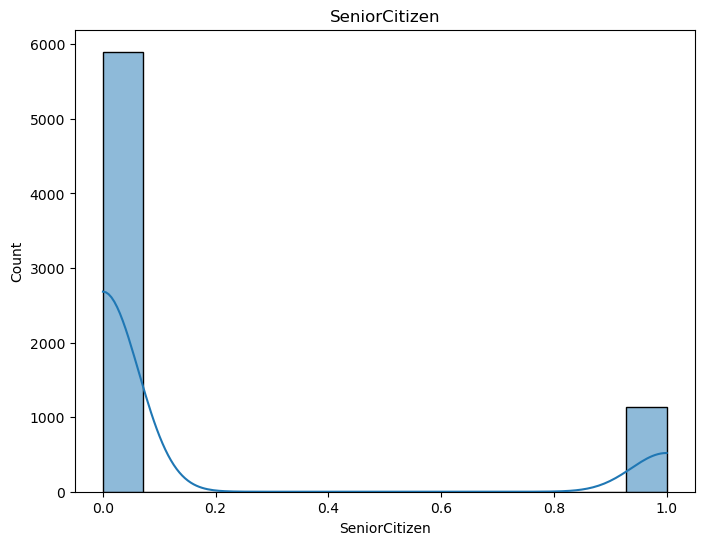

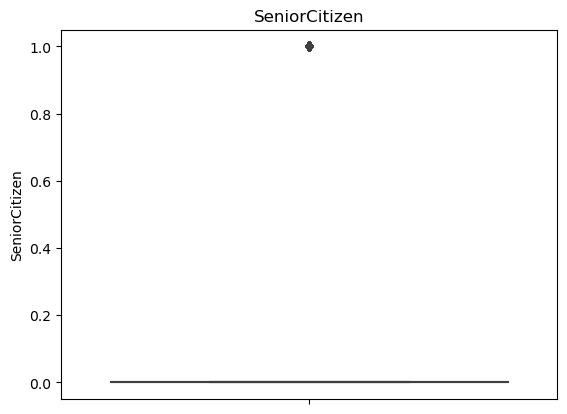

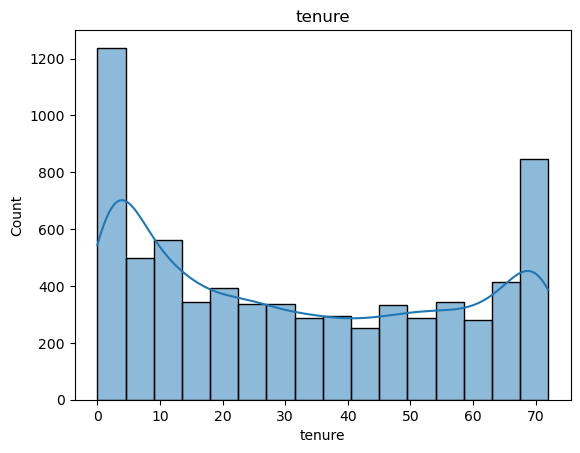

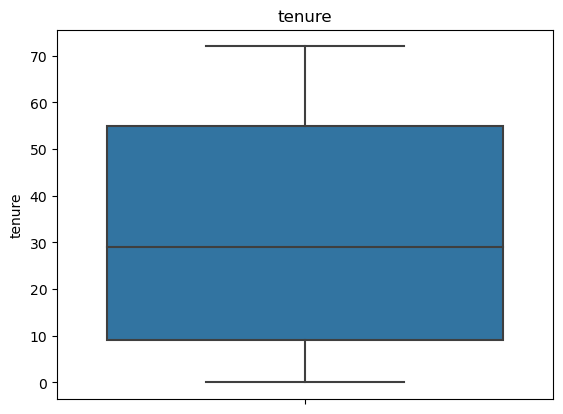

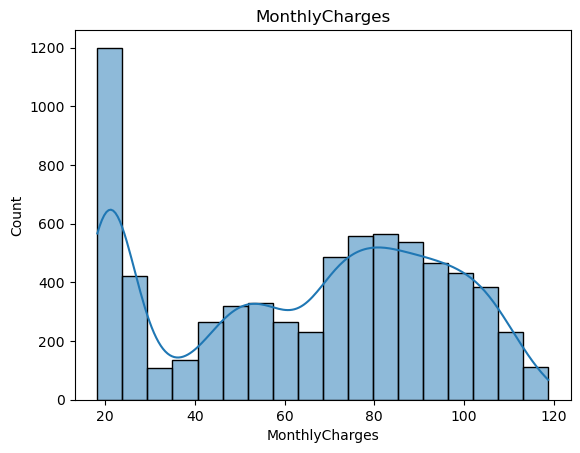

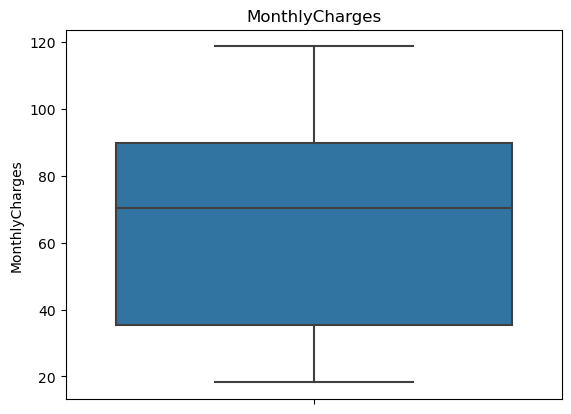

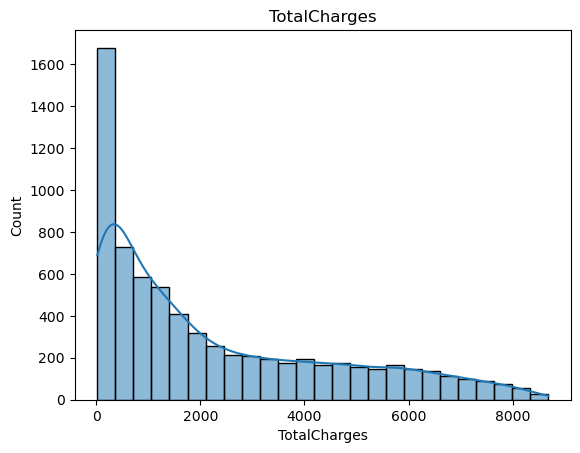

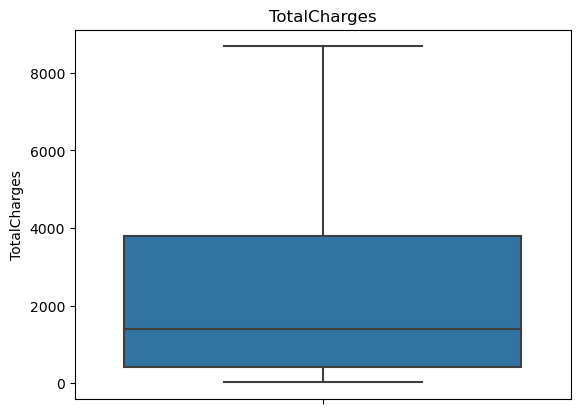

In [21]:
# Set figure size for plots
plt.figure(figsize=(8,6))

# Loop through each column in the DataFrame
for col in churn_data.columns:
    
    # Skip non-numeric columns
    if churn_data[col].dtype == 'object':
        continue
    
    # Create a histogram of the column
    sns.histplot(data=churn_data, x=col, kde=True)
    plt.title(col)
    plt.show()
    
    # Create a boxplot of the column
    sns.boxplot(data=churn_data, y=col)
    plt.title(col)
    plt.show()

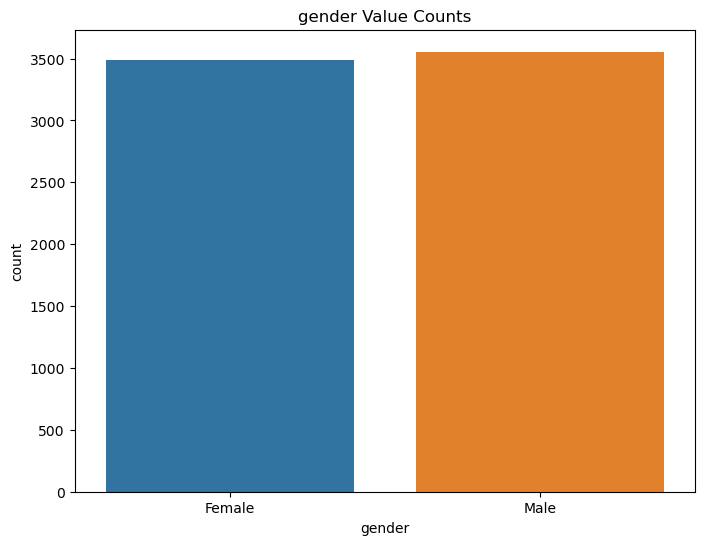

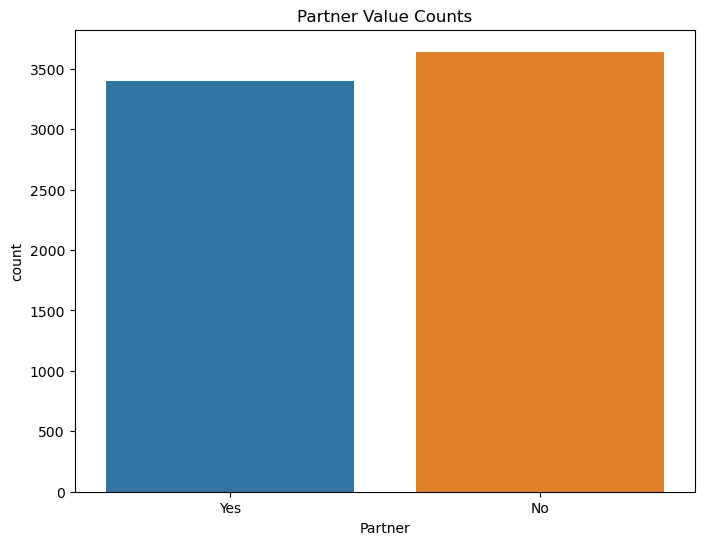

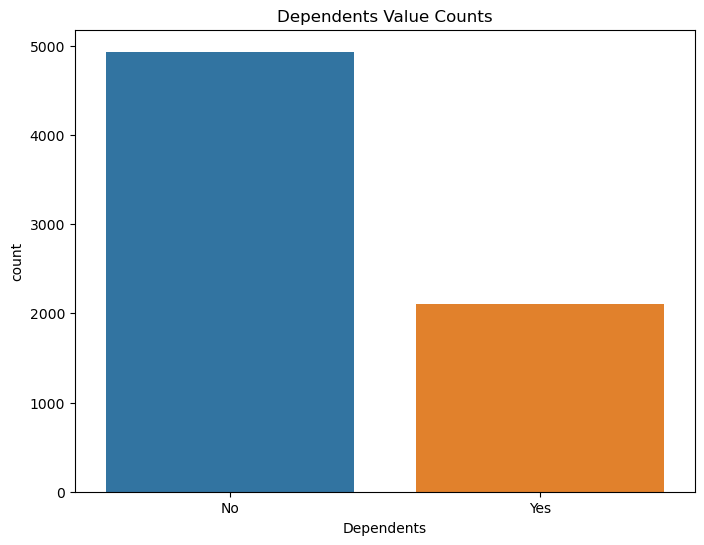

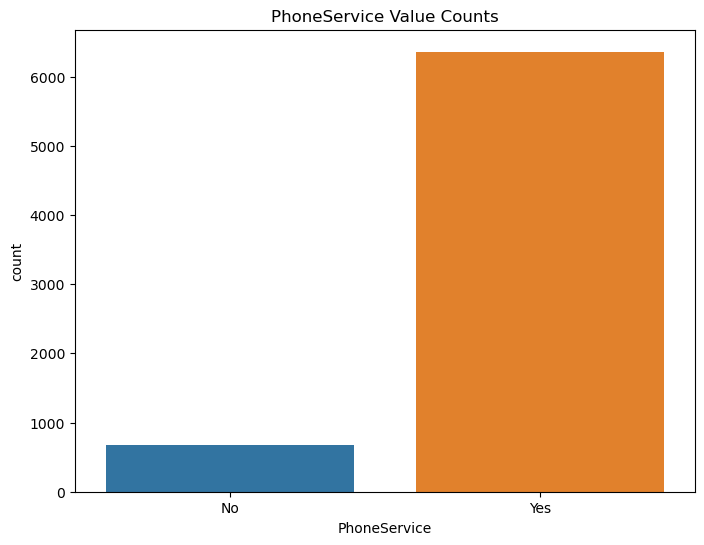

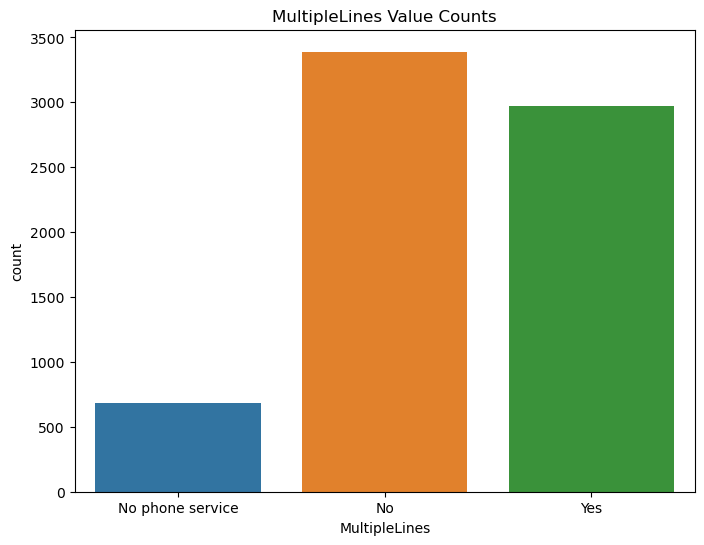

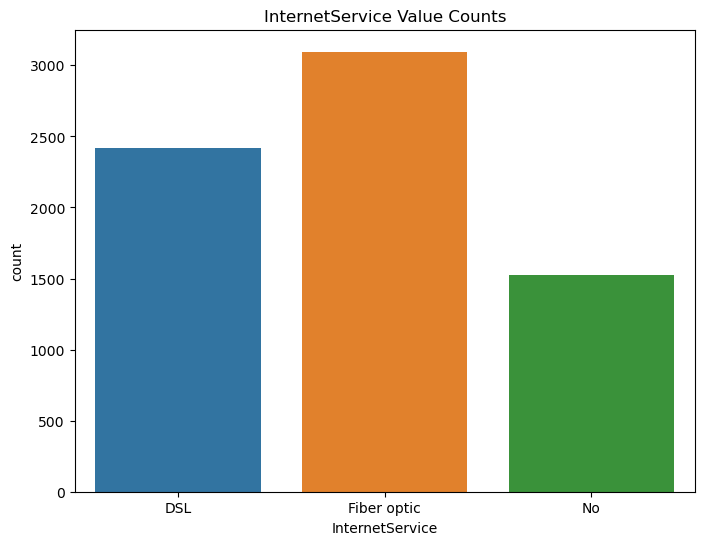

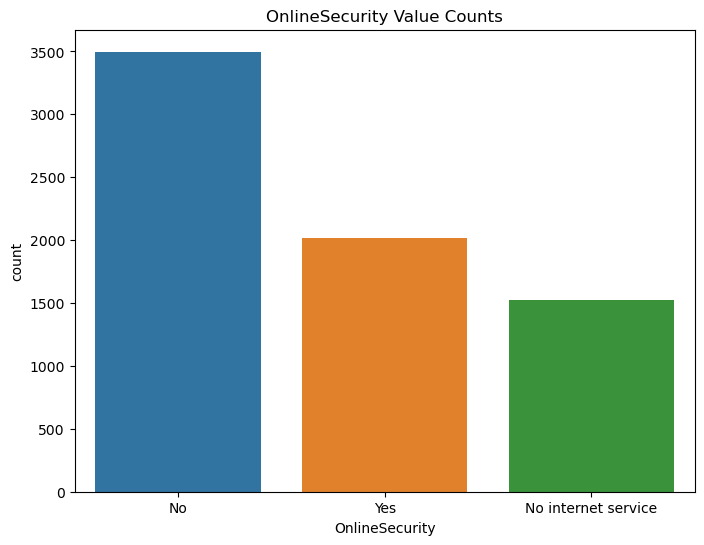

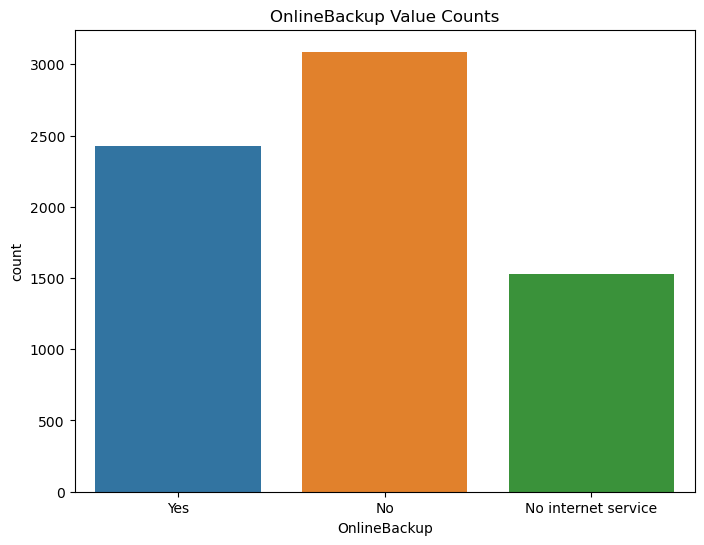

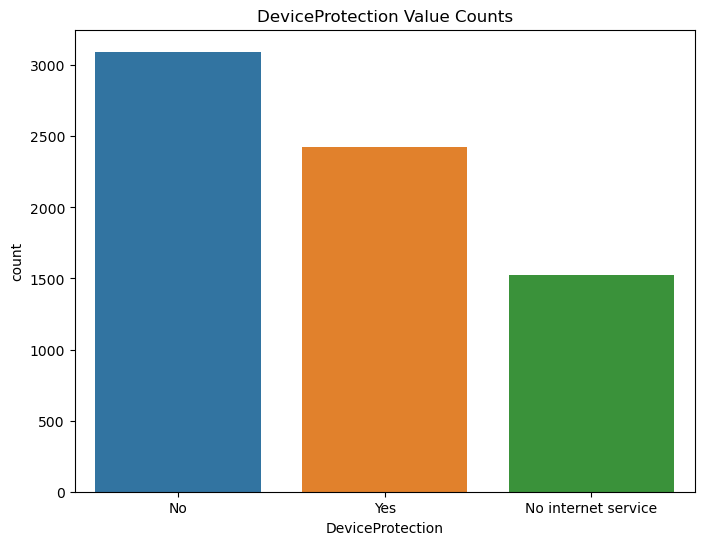

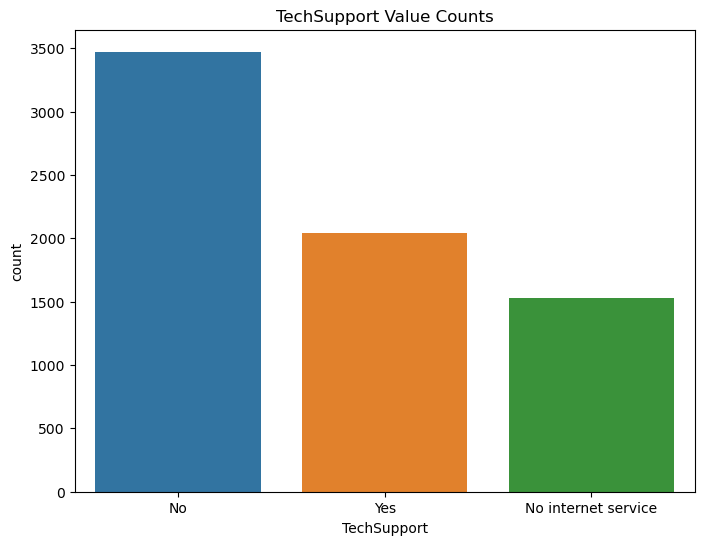

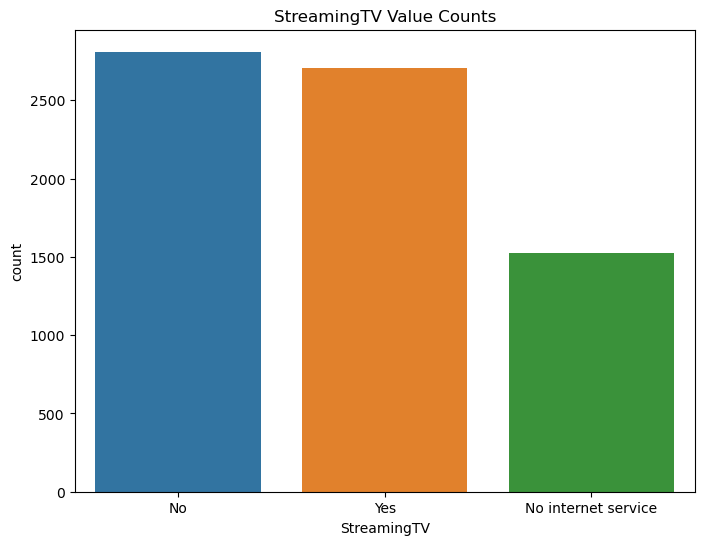

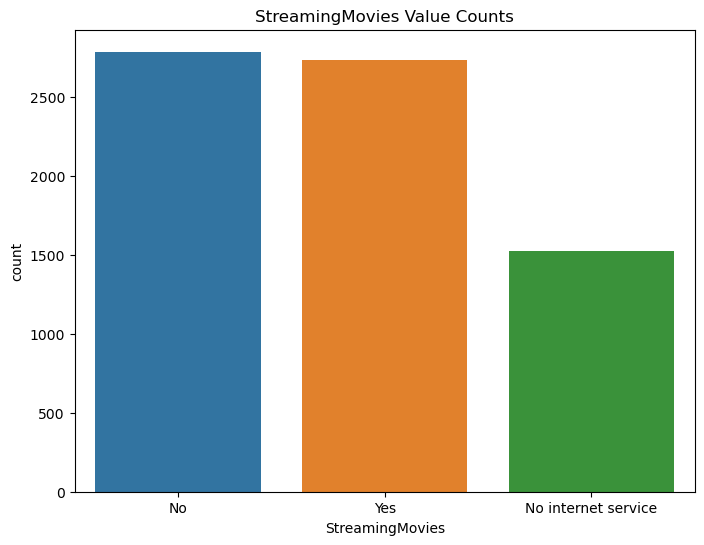

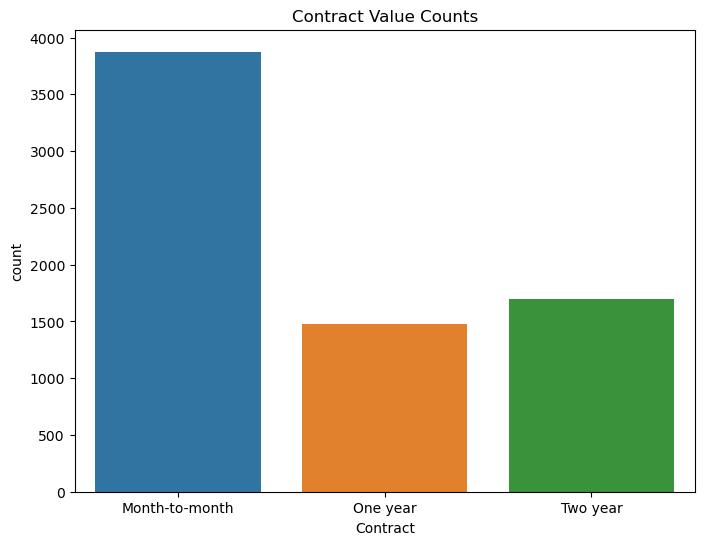

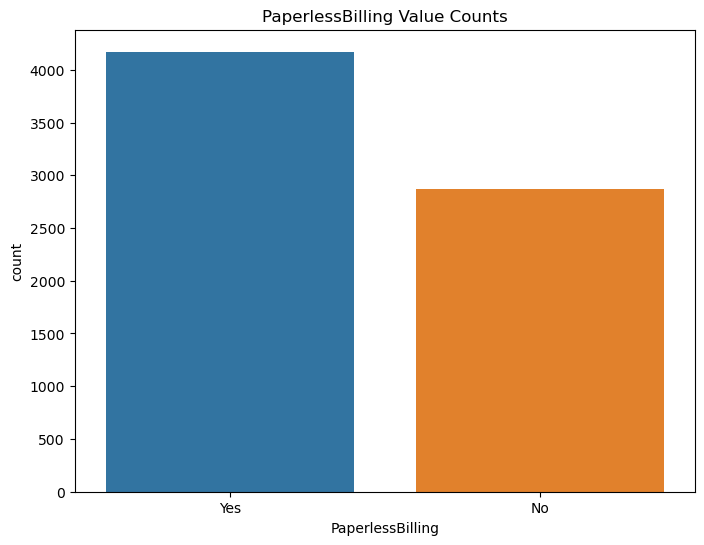

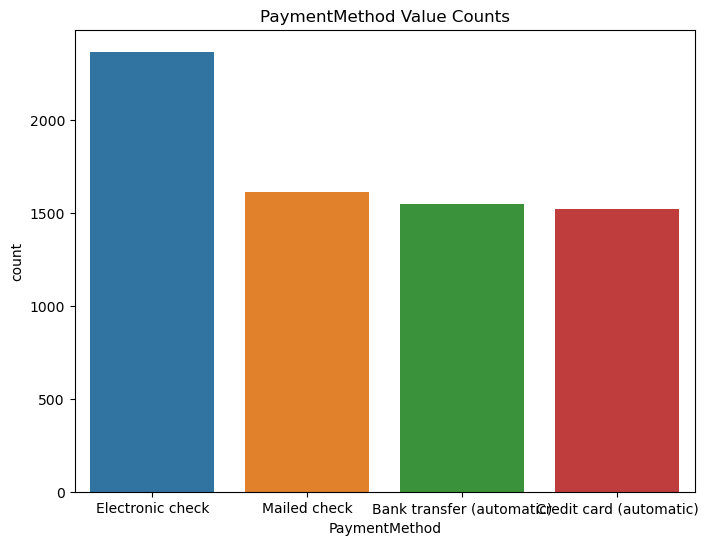

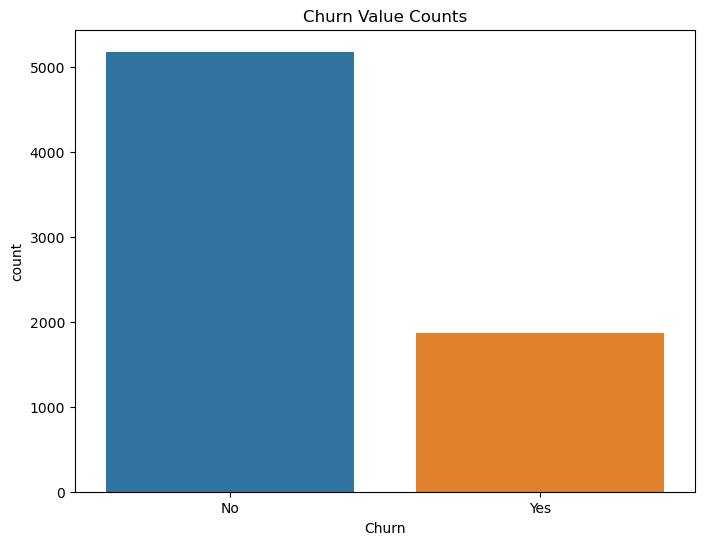

In [22]:
churn_data1 = churn_data.drop("customerID", axis=1)
obj_cols = churn_data1.select_dtypes(include='object').columns

for col in obj_cols:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=col, data=churn_data1)
    ax.set_title(f"{col} Value Counts")
    plt.show()

### Bivariate Analysis

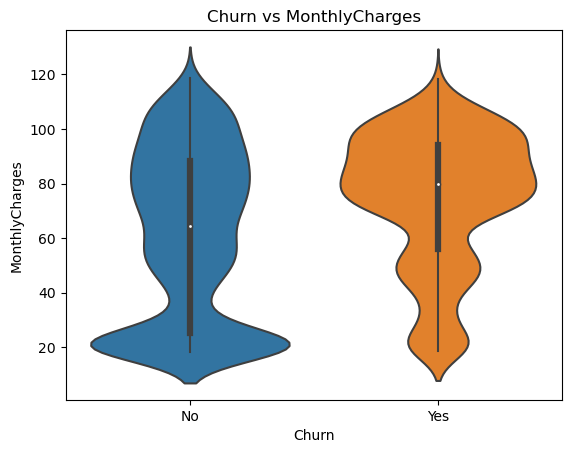

In [23]:
sns.violinplot(x='Churn', y='MonthlyCharges', data=churn_data)
plt.title('Churn vs MonthlyCharges')
plt.show()


In [24]:
correlation_coefficient = churn_data['MonthlyCharges'].corr(churn_data['TotalCharges'])
print(correlation_coefficient)


0.6504680404415565


<AxesSubplot: xlabel='MonthlyCharges', ylabel='TotalCharges'>

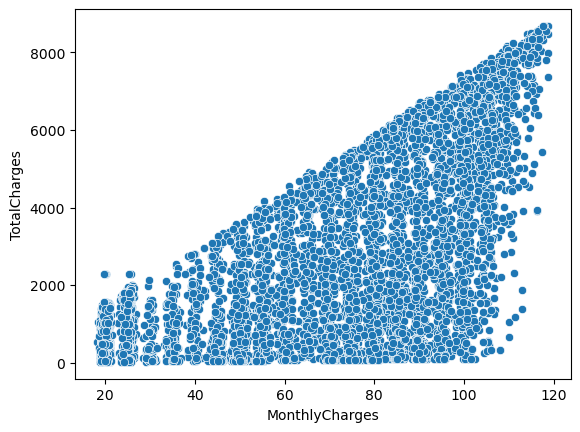

In [25]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=churn_data)

In [26]:
correlation_coefficient = churn_data['tenure'].corr(churn_data['TotalCharges'])
print(correlation_coefficient)


0.8247573156351037


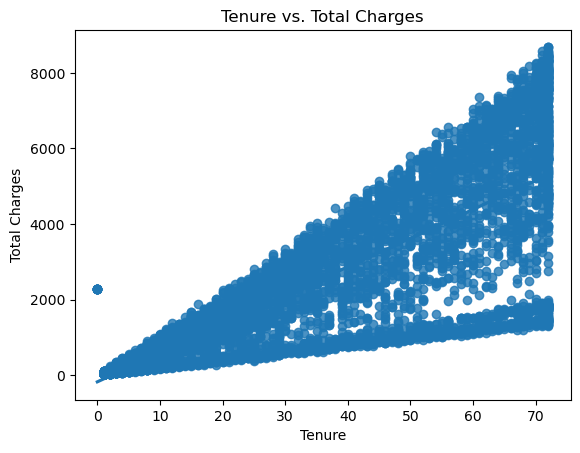

In [27]:
sns.regplot(x='tenure', y='TotalCharges', data=churn_data)
plt.title("Tenure vs. Total Charges")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.show()


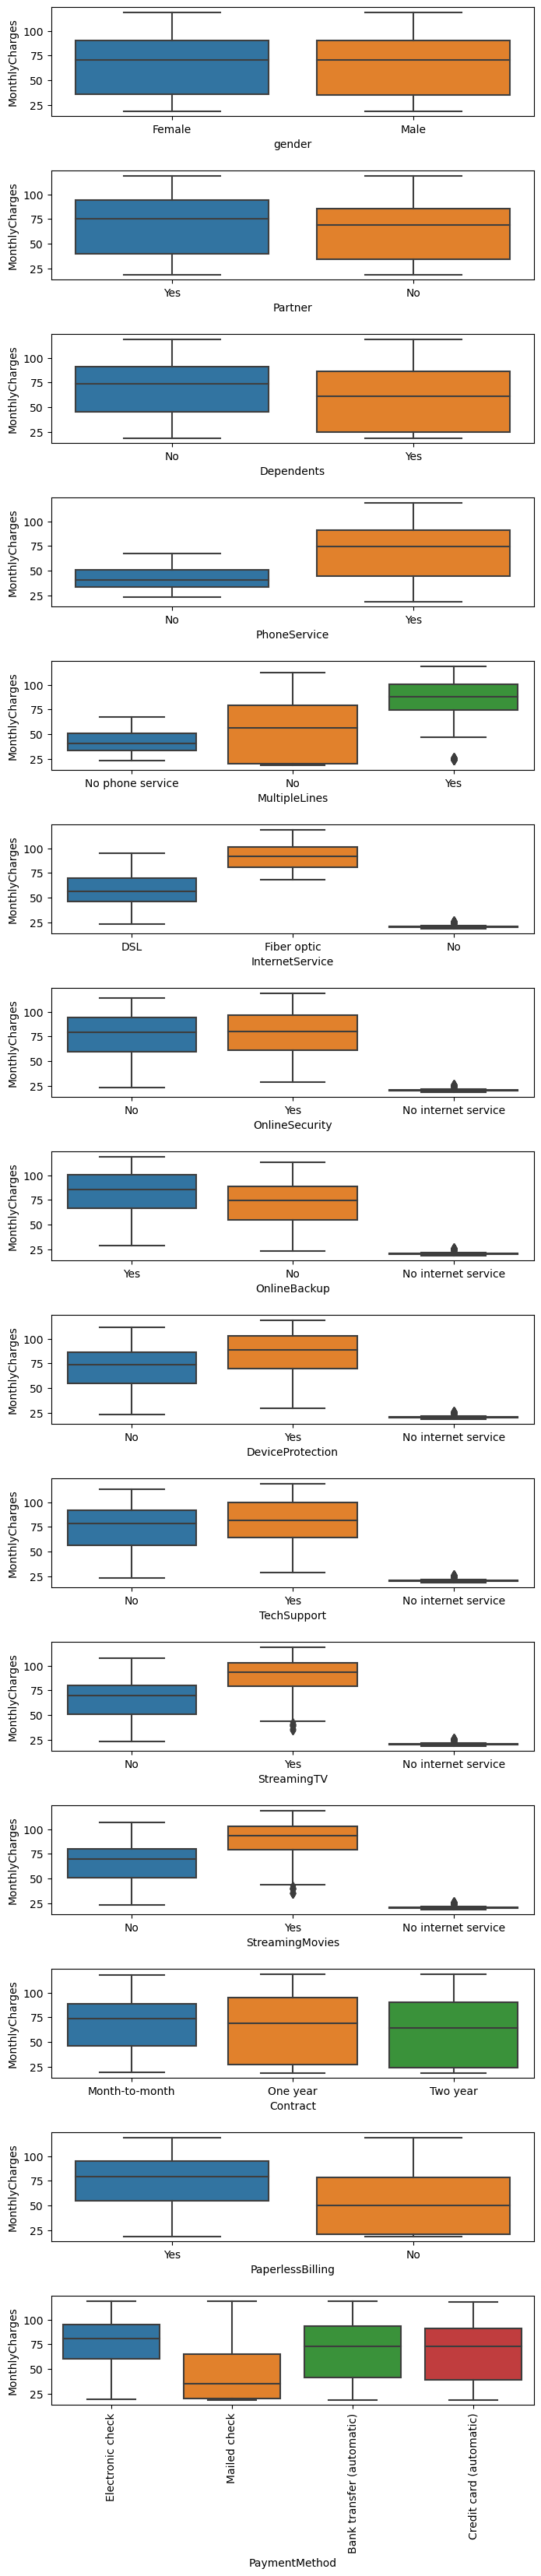

In [28]:
# Create a list of all categorical columns except Churn and CustomerID
cat_cols = churn_data.select_dtypes(include=['object']).columns.drop(['Churn','customerID'])

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Loop through each categorical column and create a box plot with MonthlyCharges
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='MonthlyCharges', data=churn_data, ax=axes[i])
    axes[i].set_xlabel(col)
    
plt.xticks(rotation=90)
    
# Display the plot
plt.show()


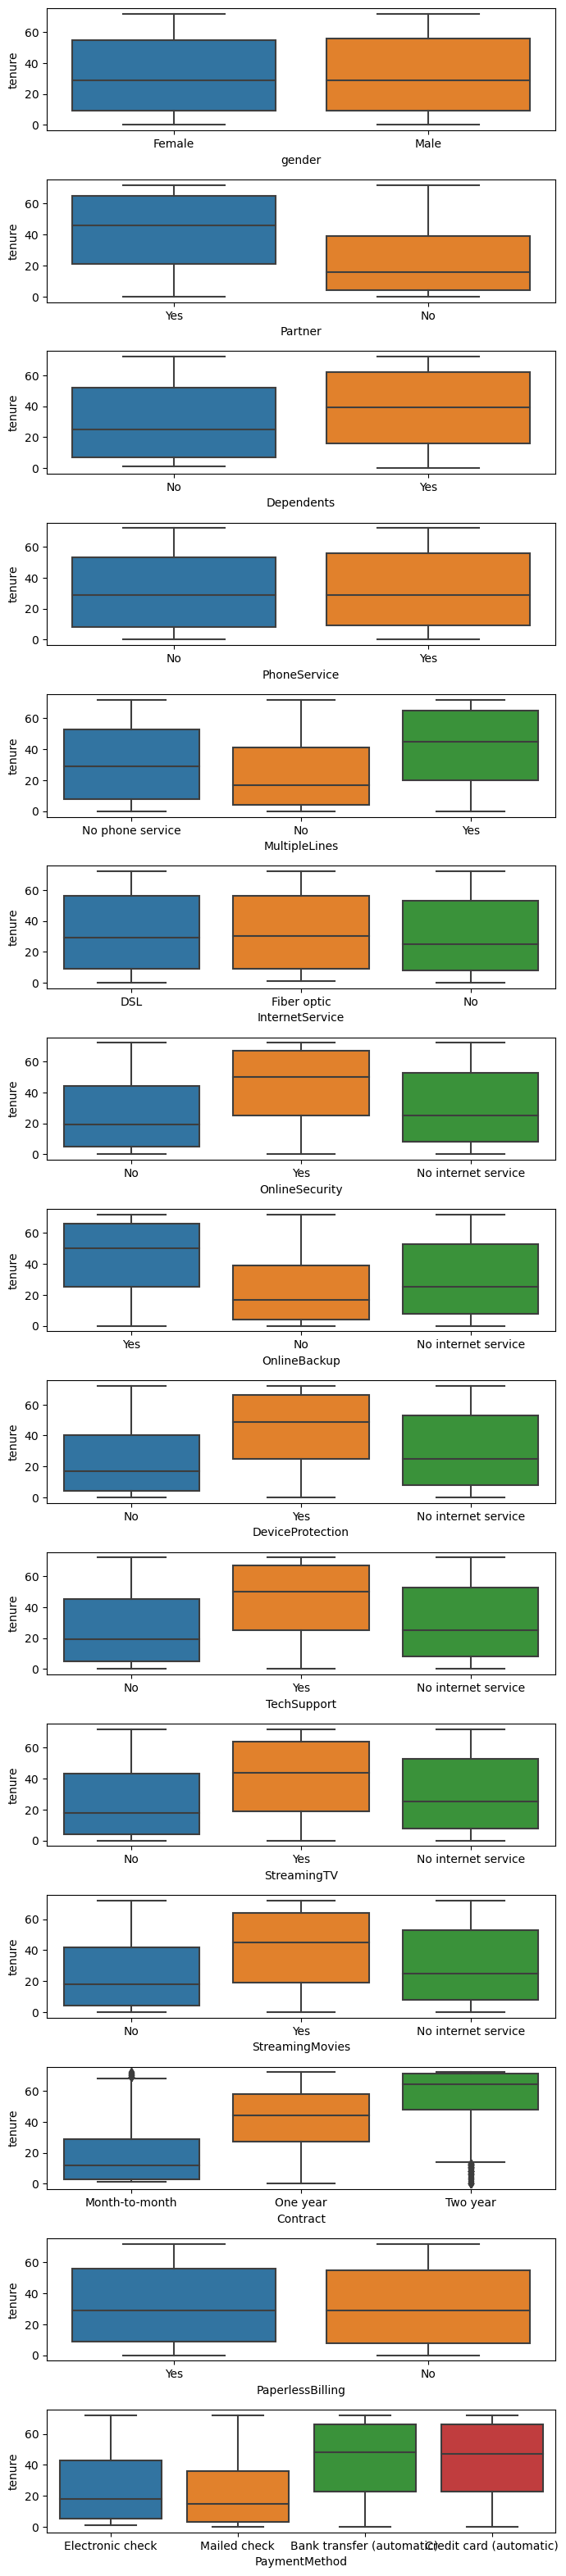

In [29]:
# Create a list of all categorical columns except Churn and CustomerID
cat_cols = churn_data.select_dtypes(include=['object']).columns.drop(['Churn','customerID'])

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Loop through each categorical column and create a box plot with MonthlyCharges
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='tenure', data=churn_data, ax=axes[i])
    axes[i].set_xlabel(col)
    
# Display the plot
plt.show()


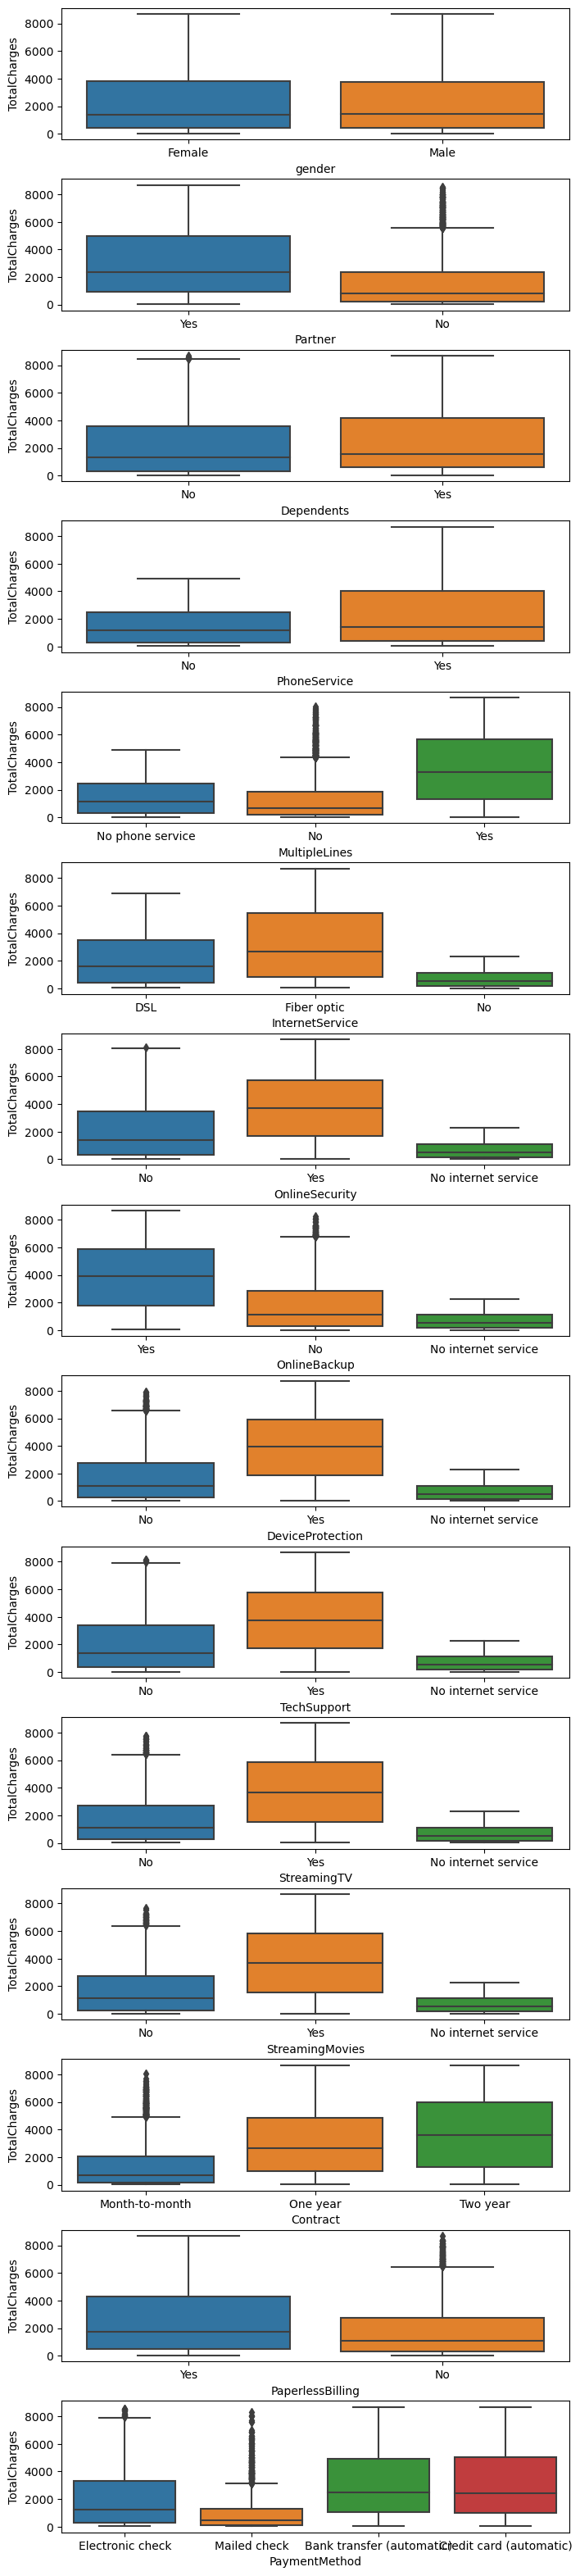

In [30]:
# Create a list of all categorical columns except Churn and CustomerID
cat_cols = churn_data.select_dtypes(include=['object']).columns.drop(['Churn','customerID'])

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Loop through each categorical column and create a box plot with MonthlyCharges
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='TotalCharges', data=churn_data, ax=axes[i])
    axes[i].set_xlabel(col)
    
# Display the plot
plt.show()


### Multivariate Analaysis 

Heatmap to visualize the correlation between all the numerical attributes in the dataset.

Scatter plot matrix to visualize the pairwise relationships between all the numerical attributes in the dataset.

Box plot of the monthly charges for each combination of internet service type and contract type.

Stacked bar chart to compare the number of customers who churned and did not churn, grouped by internet service type and payment method.

Heatmap of the monthly charges for each combination of internet service type, online security, and online backup.

Parallel coordinates plot to visualize the relationship between the tenure, monthly charges, and total charges for each gender.

Bubble plot to visualize the relationship between the tenure, monthly charges, and total charges, with the size of each bubble representing the number of customers in each group.

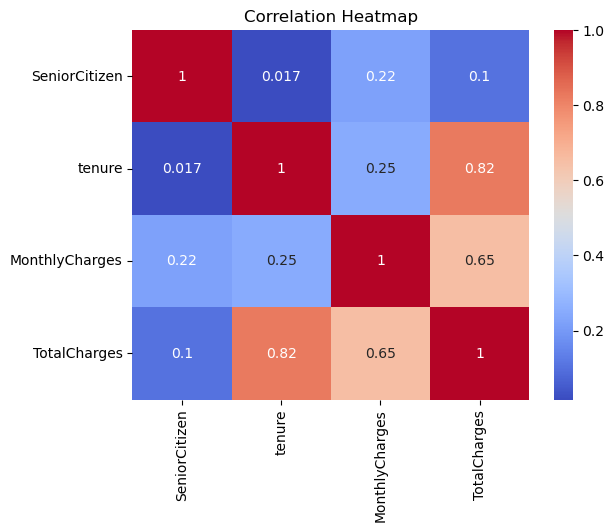

In [31]:
# Heatmap to visualize the correlation between all the numerical attributes in the dataset.

numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = churn_data[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

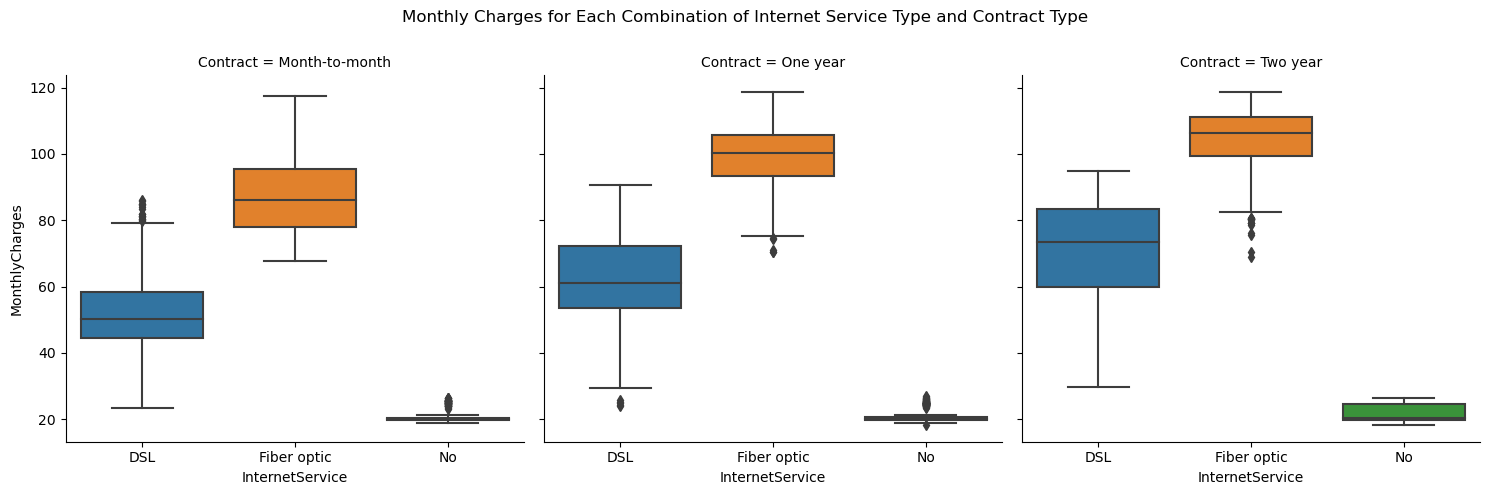

In [32]:
# Box plot of the monthly charges for each combination of internet service type and contract type.

# Filter the data for only the relevant columns
internet_contract = churn_data[['InternetService', 'Contract', 'MonthlyCharges']]

# Create the box plot
sns.catplot(x='InternetService', y='MonthlyCharges', col='Contract', data=internet_contract, kind='box')

# Add plot titles and labels
plt.suptitle('Monthly Charges for Each Combination of Internet Service Type and Contract Type')
plt.subplots_adjust(top=0.85)
plt.show()


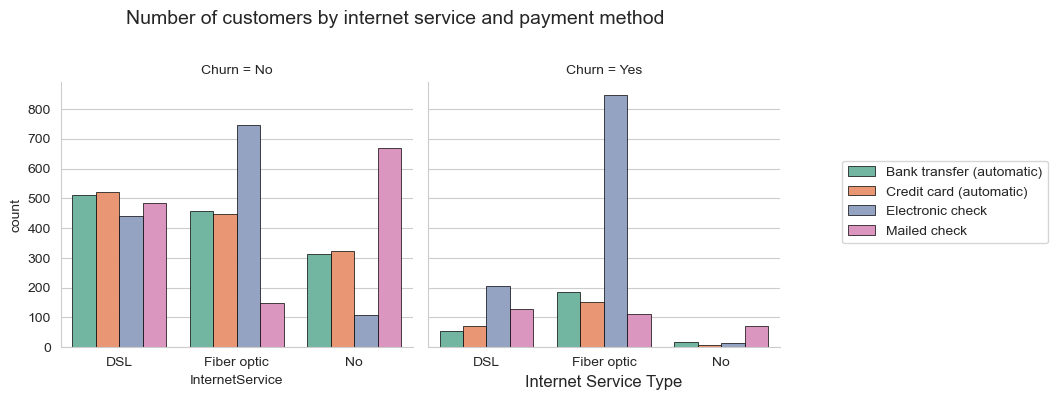

In [33]:
#Stacked bar chart to compare the number of customers who churned and did not churn, grouped by internet service type and payment method.

# Subset the data to include only relevant columns
churn_data_sub = churn_data[['Churn', 'InternetService', 'PaymentMethod']]

# Group by the variables and count the number of occurrences
churn_data_grouped = churn_data_sub.groupby(['Churn', 'InternetService', 'PaymentMethod']).size().reset_index(name='count')

# Create a stacked bar chart
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.catplot(x='InternetService', y='count', hue='PaymentMethod', col='Churn', data=churn_data_grouped, kind='bar', height=4, aspect=1, legend=False, edgecolor='black', linewidth=0.5)

# Set the chart title and axes labels
plt.subplots_adjust(top=0.8)
plt.suptitle('Number of customers by internet service and payment method', fontsize=14)
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.gcf().legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left')


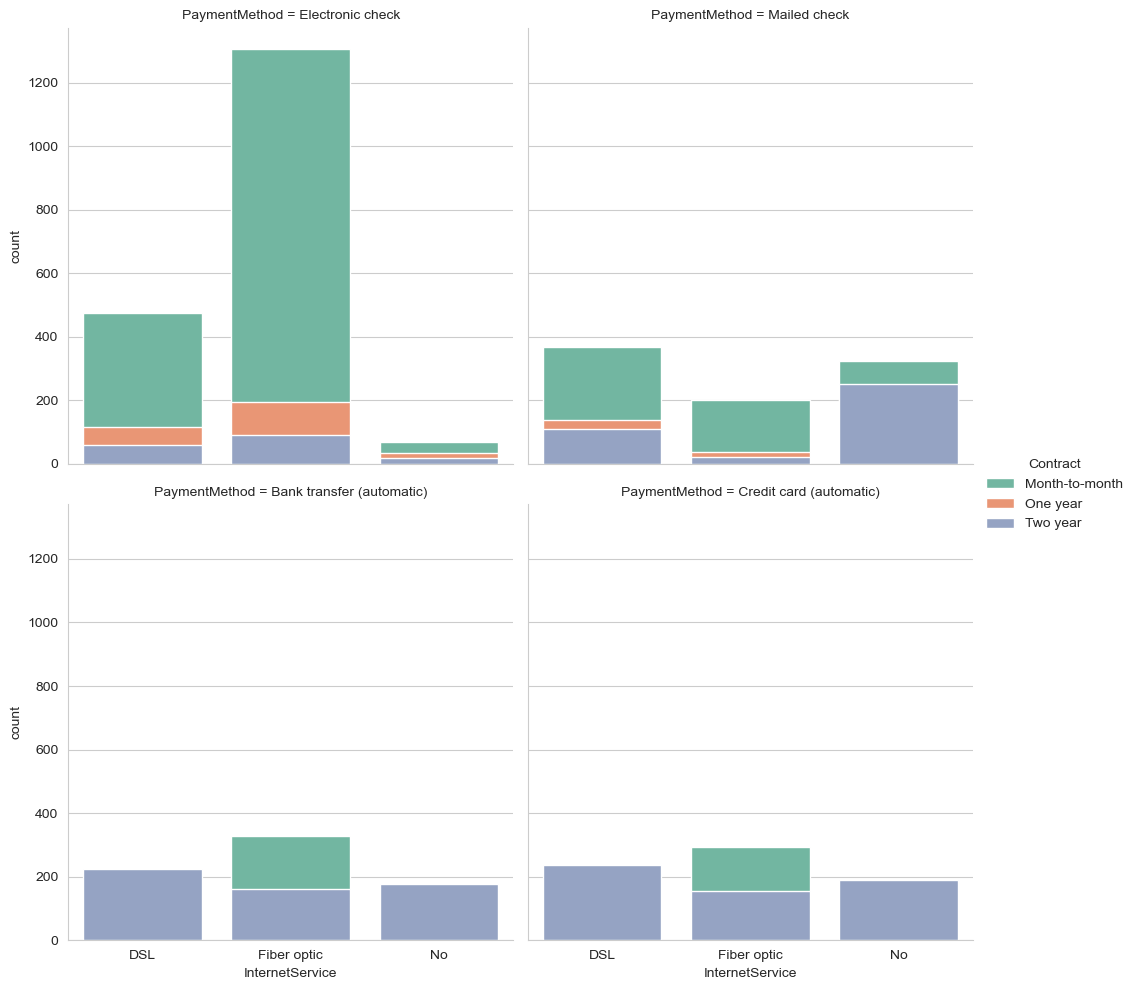

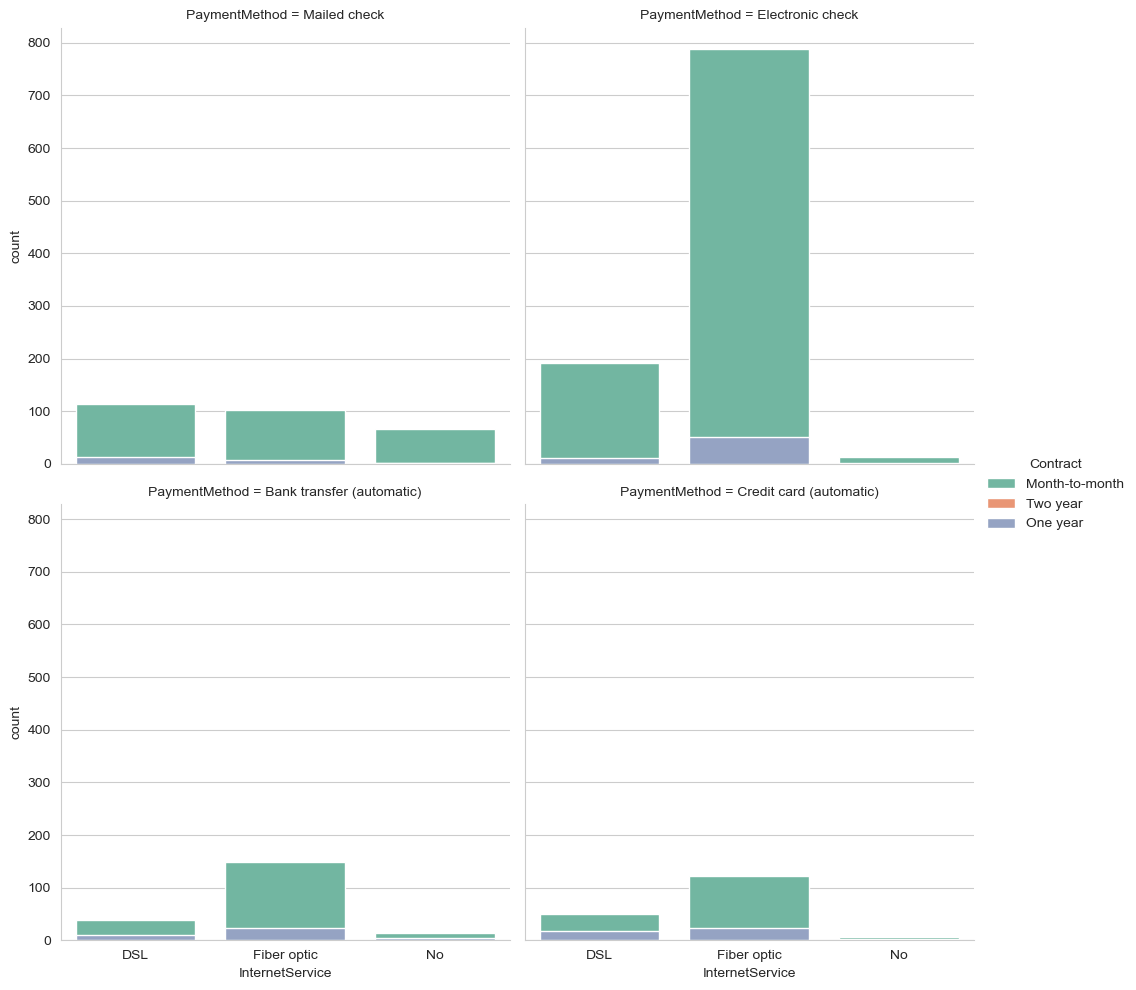

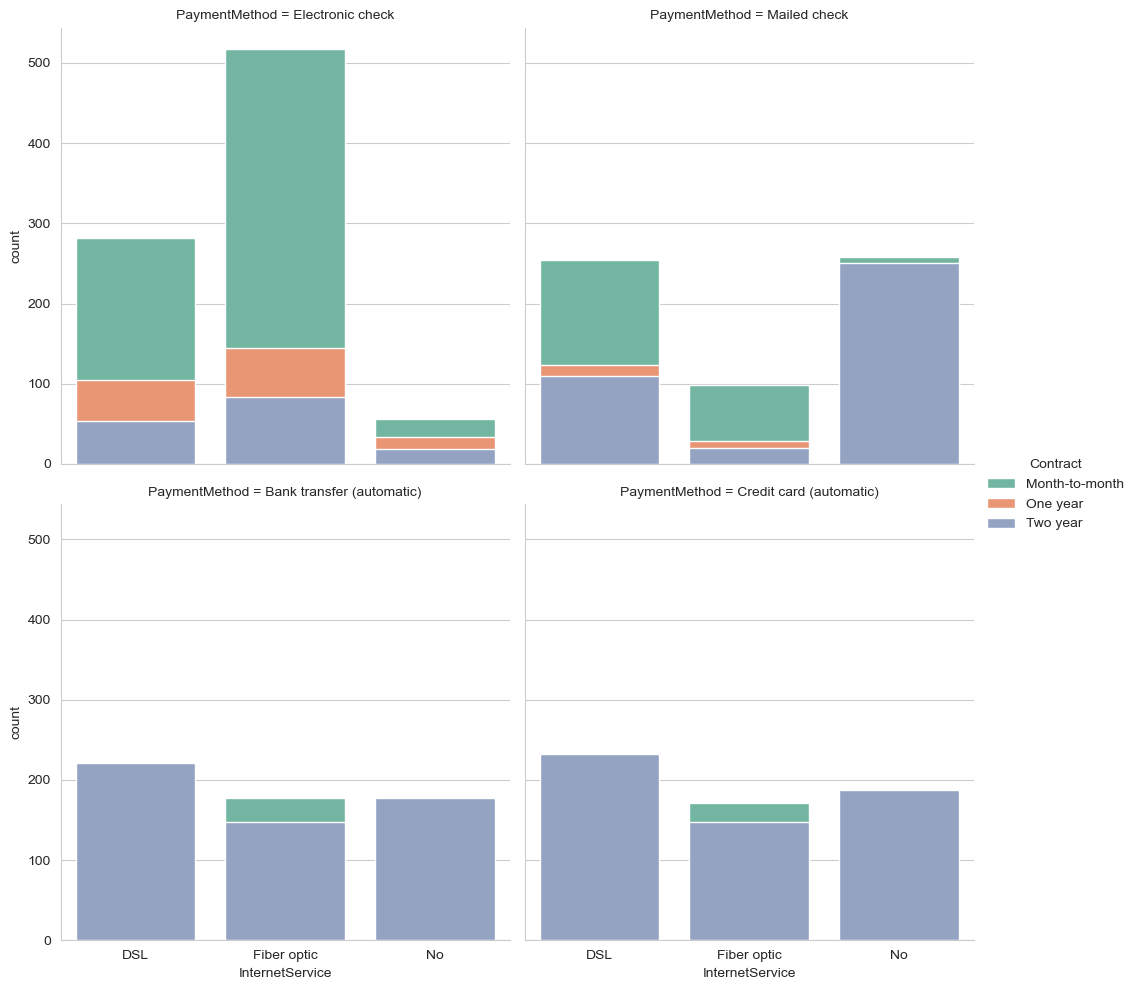

In [34]:
#Clustered bar chart to compare the count of customers who churned and did not churn, grouped by internet service type, contract type, and payment method.

# Subset the data for customers who churned and did not churn
churned_data = churn_data[churn_data['Churn'] == 'Yes']
not_churned_data = churn_data[churn_data['Churn'] == 'No']

# Create a countplot for each group, grouped by internet service type, contract type, and payment method
sns.catplot(x='InternetService', hue='Contract', col='PaymentMethod', data=churn_data, kind='count', col_wrap=2, dodge=False)
sns.catplot(x='InternetService', hue='Contract', col='PaymentMethod', data=churned_data, kind='count', col_wrap=2, dodge=False)
sns.catplot(x='InternetService', hue='Contract', col='PaymentMethod', data=not_churned_data, kind='count', col_wrap=2, dodge=False)

# Show the plot
plt.show()


#### HYPOTHESIS TESTING 

Chi-Squared: 1184.5965720837926
P-Value: 5.863038300673391e-258
Degrees of Freedom: 2
Expected Frequencies:
 [[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]


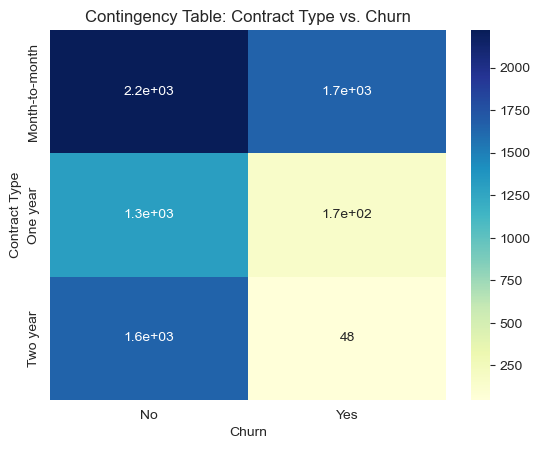

In [35]:
import seaborn as sns
from scipy.stats import chi2_contingency

# Create a contingency table of contract type and churn
cont_table = pd.crosstab(churn_data['Contract'], churn_data['Churn'])

# Conduct the chi-squared test
chi2, p_val, dof, expected = chi2_contingency(cont_table)

# Print the test results
print(f"Chi-Squared: {chi2}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Visualize the contingency table as a heatmap
sns.heatmap(cont_table, annot=True, cmap='YlGnBu')

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Contract Type')
plt.title('Contingency Table: Contract Type vs. Churn')

# Display the plot
plt.show()


The null hypothesis is that there is no association between the 'Contract' and 'Churn' variables (i.e., customers on 2-year contracts are equally likely to churn as customers on other contract types). The alternate hypothesis is that there is an association between the two variables (i.e., customers on 2-year contracts are more or less likely to churn than customers on other contract types).

If the p-value is less than our significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables. If the p-value is greater than our significance level, we fail to reject the null hypothesis.

The heatmap visualizes the contingency table by coloring each cell with a different color based on the value in the cell. The annotation in each cell shows the count of observations in that particular category.

In the case of a hypothesis test, the heat map can provide an easy way to see if there is a clear relationship between the two categorical variables in the contingency table. For example, if there is a pattern where one category tends to have higher counts than the other, it suggests that the two variables may be related.

# Answering Business Questions

## Demographic Factors:

### 1. What is the gender distribution of customers?

In [36]:
df = churn_data.copy()

# Count the number of customers by gender
gender_counts = df["gender"].value_counts()

# Print the gender distribution
print("Gender Distribution:")
print(gender_counts)

Gender Distribution:
Male      3555
Female    3488
Name: gender, dtype: int64


This code assumes that the "gender" column in your dataset contains the gender of each customer, and that the values in this column are either "Male" or "Female". The value_counts() method is used to count the number of occurrences of each gender in the dataset, and the resulting counts are stored in the gender_counts variable. Finally, the code prints out the gender distribution by printing the gender_counts variable.

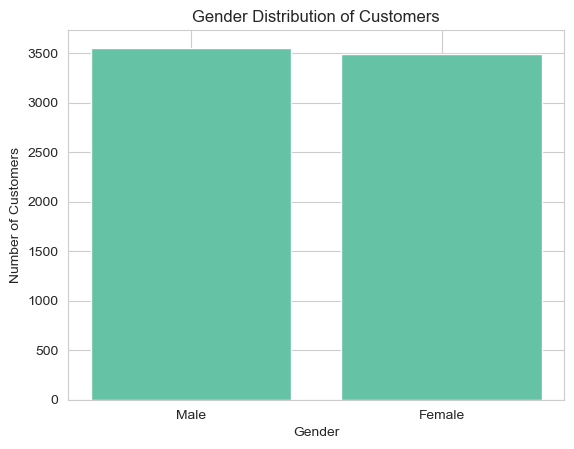

In [37]:
# Visualize the gender distribution as a bar plot
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

### 2.  What is the distribution of customers based on their senior citizen status?

In [38]:
# Count the number of customers by senior citizen status
senior_counts = df["SeniorCitizen"].value_counts()

# Print the distribution of customers based on their senior citizen status
print("Senior Citizen Distribution of Customers:\n")
print(senior_counts)

Senior Citizen Distribution of Customers:

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


This code counts the number of customers in the dataset based on their senior citizen status, which is represented by the "SeniorCitizen" column in the dataframe. The resulting output shows the distribution of customers as a count of "0" and "1", where "0" represents customers who are not senior citizens and "1" represents customers who are senior citizens.

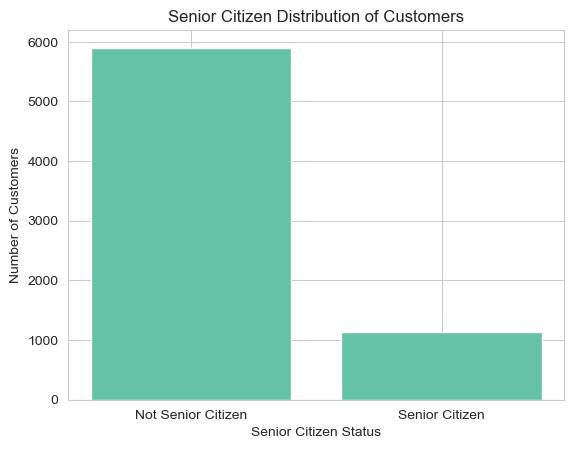

In [39]:
# Count the number of customers by senior citizen status
senior_counts = df["SeniorCitizen"].value_counts()

# Visualize the senior citizen distribution as a bar plot
plt.bar(["Not Senior Citizen", "Senior Citizen"], senior_counts.values)
plt.title("Senior Citizen Distribution of Customers")
plt.xlabel("Senior Citizen Status")
plt.ylabel("Number of Customers")
plt.show()

### 3. What is the distribution of customers based on their partnership status?

In [40]:
# Count the number of customers by partnership status
partner_counts = df["Partner"].value_counts()

# Print the distribution of customers based on their partnership status
print("Partnership Distribution of Customers:\n")
print(partner_counts)

Partnership Distribution of Customers:

No     3641
Yes    3402
Name: Partner, dtype: int64


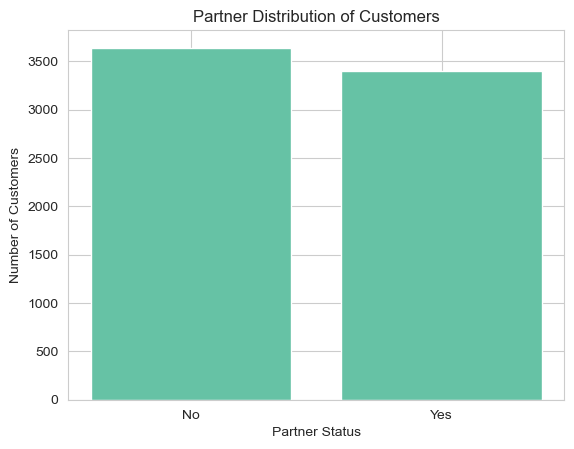

In [41]:
# Count the number of customers by partnership status
partner_counts = df["Partner"].value_counts()

# Visualize the partnership distribution as a bar plot
plt.bar(partner_counts.index, partner_counts.values)
plt.title("Partner Distribution of Customers")
plt.xlabel("Partner Status")
plt.ylabel("Number of Customers")
plt.show();

The x-axis shows the two categories, "Yes" and "No", representing the partnership status of the customers. The y-axis shows the count of customers in each category. The title of the chart summarizes the information shown in the chart, which is the partnership distribution of customers.

### 4. What is the distribution of customers based on their dependents status?

In [42]:
# Count the number of customers by dependents status
dependents_counts = df["Dependents"].value_counts()

# Print the distribution of customers based on their dependents status
print("Dependents Distribution of Customers:\n")
print(dependents_counts)

Dependents Distribution of Customers:

No     4933
Yes    2110
Name: Dependents, dtype: int64


This code counts the number of customers in the dataset based on their dependents status, which is represented by the "Dependents" column in the dataframe. The resulting output shows the distribution of customers as a count of "Yes" and "No", where "Yes" represents customers who have dependents and "No" represents customers who do not have dependents.

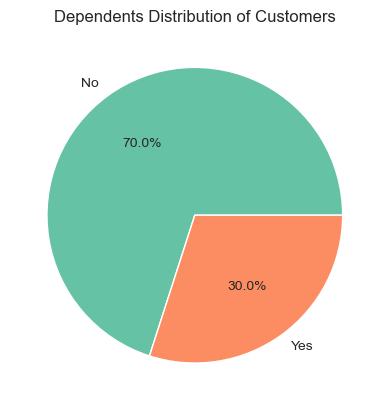

In [43]:
# Count the number of customers by dependents status
dependents_counts = df["Dependents"].value_counts()

# Visualize the dependents distribution as a pie chart
plt.pie(dependents_counts.values, labels=dependents_counts.index, autopct='%1.1f%%')
plt.title("Dependents Distribution of Customers")
plt.show();

## Services Availed:

### 1. What is the distribution of customers based on their phone service status?

In [44]:
# Count the number of customers by phone service status
phone_service_counts = df["PhoneService"].value_counts()

# Print the distribution of customers based on their phone service status
print("Phone Service Distribution of Customers:\n")
print(phone_service_counts)

Phone Service Distribution of Customers:

Yes    6361
No      682
Name: PhoneService, dtype: int64


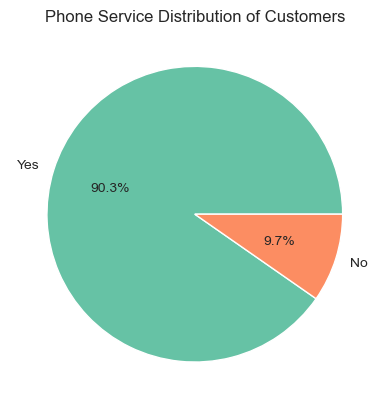

In [45]:
# Count the number of customers by phone service status
phone_service_counts = df["PhoneService"].value_counts()

# Visualize the phone service distribution as a pie chart
plt.pie(phone_service_counts.values, labels=phone_service_counts.index, autopct='%1.1f%%')
plt.title("Phone Service Distribution of Customers")
plt.show()

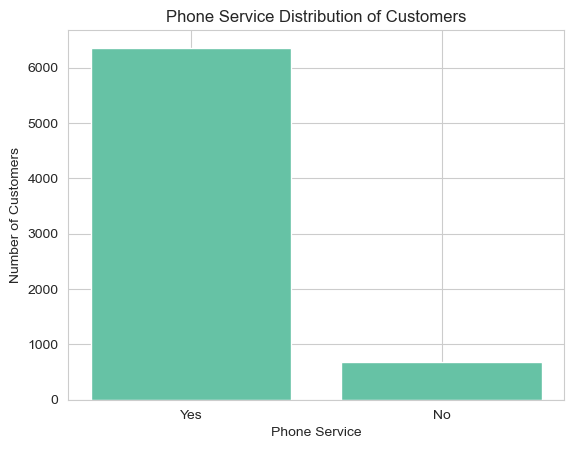

In [46]:
# Visualize the phone service distribution as a bar plot
plt.bar(phone_service_counts.index, phone_service_counts.values)
plt.title("Phone Service Distribution of Customers")
plt.xlabel("Phone Service")
plt.ylabel("Number of Customers")
plt.show()

### 2. What is the distribution of customers based on their multiple lines status?

In [47]:
# Count the number of customers by multiple lines status
multiple_lines_counts = df["MultipleLines"].value_counts()
multiple_lines_counts
# Visualize the multiple lines distribution as a pie chart
#plt.pie(multiple_lines_counts.values, labels=multiple_lines_counts.index, autopct='%1.1f%%')
#plt.title("Multiple Lines Distribution of Customers")
#plt.show()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

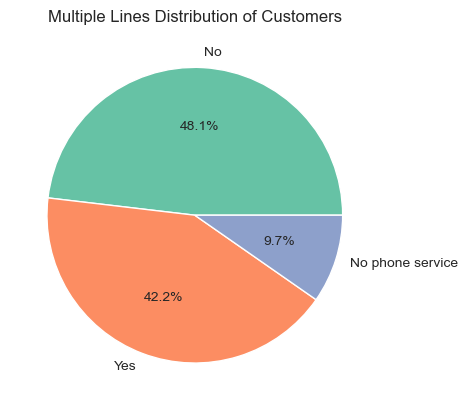

In [48]:
# Visualize the multiple lines distribution as a pie chart
plt.pie(multiple_lines_counts.values, labels=multiple_lines_counts.index, autopct='%1.1f%%')
plt.title("Multiple Lines Distribution of Customers")
plt.show()

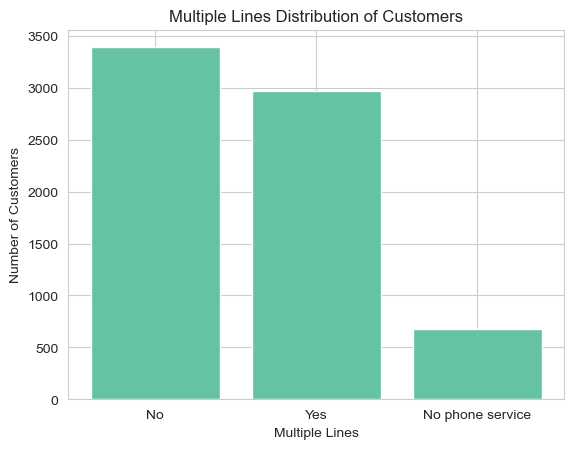

In [49]:
# Visualize the multiple lines distribution as a bar plot
plt.bar(multiple_lines_counts.index, multiple_lines_counts.values)
plt.title("Multiple Lines Distribution of Customers")
plt.xlabel("Multiple Lines")
plt.ylabel("Number of Customers")
plt.show()

### 3. What is the distribution of customers based on their internet service provider?

In [50]:
# Count the number of customers by internet service provider
internet_service_counts = df["InternetService"].value_counts()
internet_service_counts

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

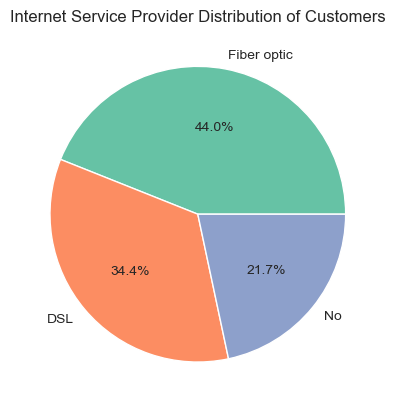

In [51]:
# Visualize the internet service provider distribution as a pie chart
plt.pie(internet_service_counts.values, labels=internet_service_counts.index, autopct='%1.1f%%')
plt.title("Internet Service Provider Distribution of Customers")
plt.show()

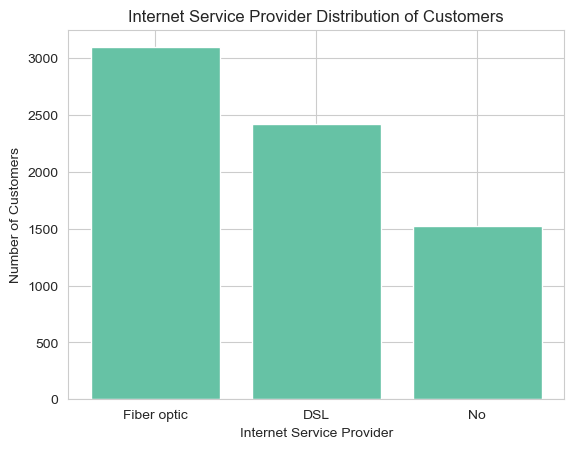

In [52]:
# Visualize the internet service provider distribution as a bar plot
plt.bar(internet_service_counts.index, internet_service_counts.values)
plt.title("Internet Service Provider Distribution of Customers")
plt.xlabel("Internet Service Provider")
plt.ylabel("Number of Customers")
plt.show()

### 4. What is the distribution of customers based on their online security status?

In [53]:
# Count the number of customers by online security status
online_security_counts = df["OnlineSecurity"].value_counts()

# Print the counts for each category
print(online_security_counts)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


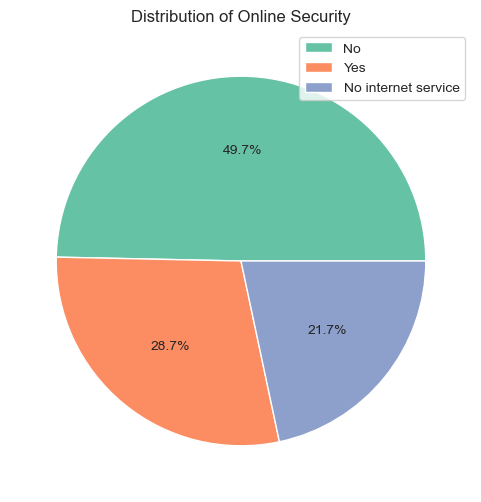

In [54]:
# Create a pie plot of the distribution
plt.figure(figsize=(6, 6))
online_security_counts.plot.pie(autopct="%.1f%%", labels=None)
plt.ylabel("")
plt.title("Distribution of Online Security")
plt.legend(labels=online_security_counts.index, loc="best")
plt.show()

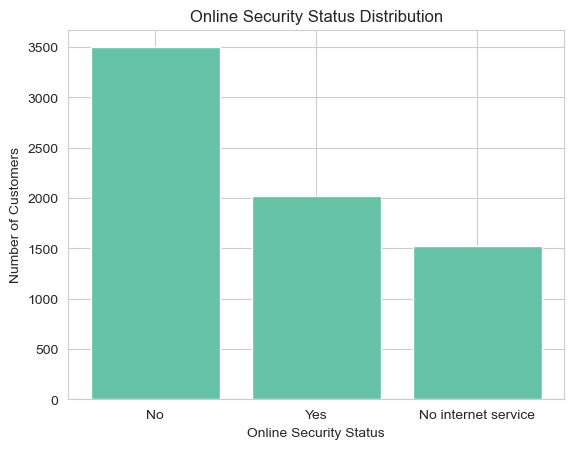

In [55]:
# Count the number of customers by online security status
online_security_counts = df["OnlineSecurity"].value_counts()

# Create a bar plot of the counts
plt.bar(online_security_counts.index, online_security_counts.values)

# Set the title and axis labels
plt.title("Online Security Status Distribution")
plt.xlabel("Online Security Status")
plt.ylabel("Number of Customers")

# Show the plot
plt.show()

### 5. What is the distribution of customers based on their online backup status?

In [56]:
# Count the number of customers by online backup status
online_backup_counts = df["OnlineBackup"].value_counts()

# Print the counts for each category
print(online_backup_counts)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


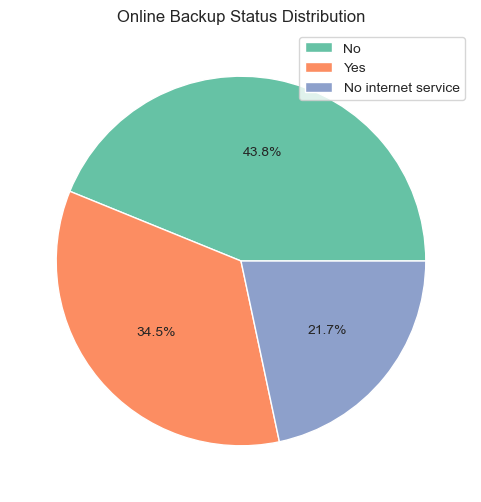

In [57]:
# Create a pie plot of the distribution
plt.figure(figsize=(6, 6))
online_backup_counts.plot.pie(autopct="%.1f%%", labels=None)
plt.ylabel("")
plt.title("Online Backup Status Distribution")
plt.legend(labels=online_backup_counts.index, loc="best")
plt.show()

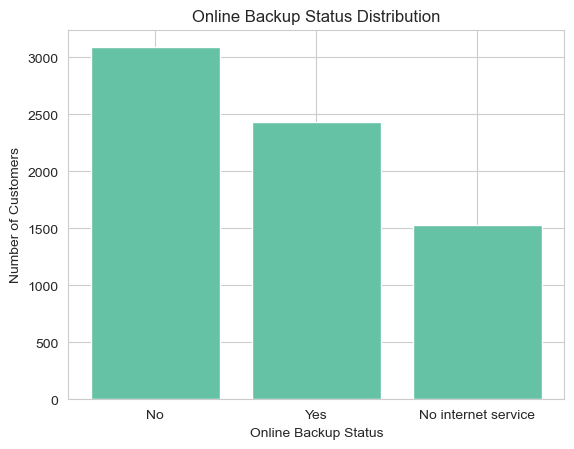

In [58]:
# Count the number of customers by online backup status
online_backup_counts = df["OnlineBackup"].value_counts()

# Create a bar plot of the counts
plt.bar(online_backup_counts.index, online_backup_counts.values)

# Set the title and axis labels
plt.title("Online Backup Status Distribution")
plt.xlabel("Online Backup Status")
plt.ylabel("Number of Customers")

# Show the plot
plt.show()

### 6. What is the distribution of customers based on their device protection status?

In [59]:
# Count the number of customers in each category of the "DeviceProtection" column
device_protection_counts = df["DeviceProtection"].value_counts()

# Print the counts
print(device_protection_counts)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


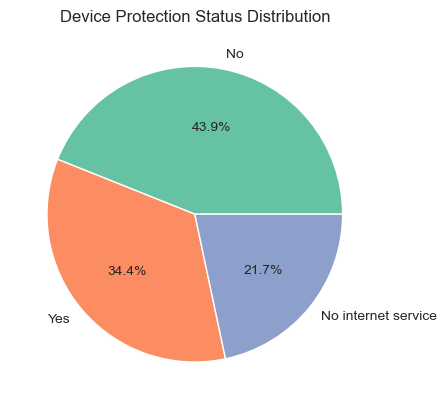

In [60]:
# Create a pie chart of the device protection status
plt.pie(device_protection_counts.values, labels=device_protection_counts.index, autopct="%.1f%%")

# Set the title
plt.title("Device Protection Status Distribution")

# Show the plot
plt.show()


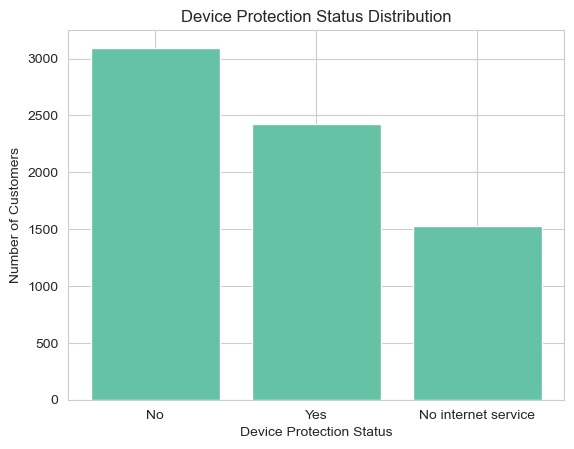

In [61]:
# Create a bar plot of the device protection status
plt.bar(device_protection_counts.index, device_protection_counts.values)

# Set the title and axis labels
plt.title("Device Protection Status Distribution")
plt.xlabel("Device Protection Status")
plt.ylabel("Number of Customers")

# Show the plot
plt.show()

### 7. What is the distribution of customers based on their tech support status?

In [62]:
tech_support_counts = df["TechSupport"].value_counts()
print(tech_support_counts)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


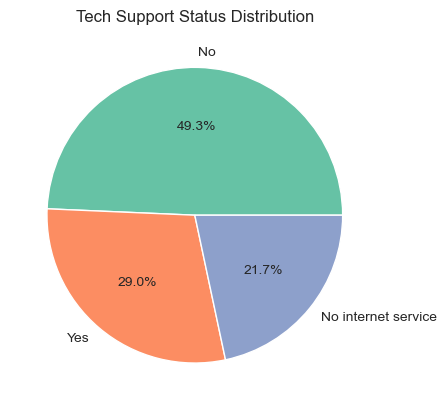

In [63]:
# Create a pie chart of the tech support status distribution
plt.pie(tech_support_counts.values, labels=tech_support_counts.index, autopct='%1.1f%%')
plt.title("Tech Support Status Distribution")
plt.show()

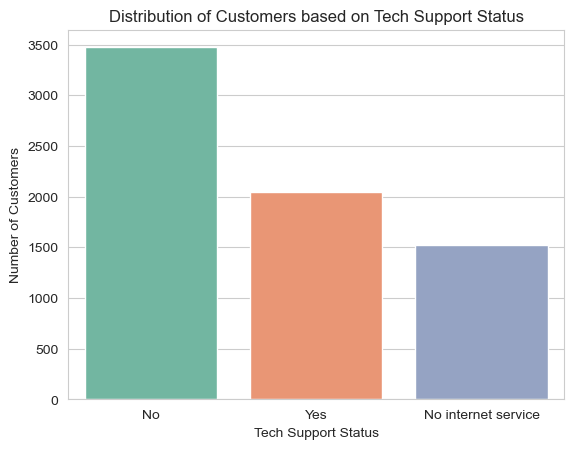

In [64]:
sns.countplot(x="TechSupport", data=df)
plt.title("Distribution of Customers based on Tech Support Status")
plt.xlabel("Tech Support Status")
plt.ylabel("Number of Customers")
plt.show()

### 8. What is the distribution of customers based on their streaming TV status?

In [65]:
streaming_tv_counts = df["StreamingTV"].value_counts()
print(streaming_tv_counts)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


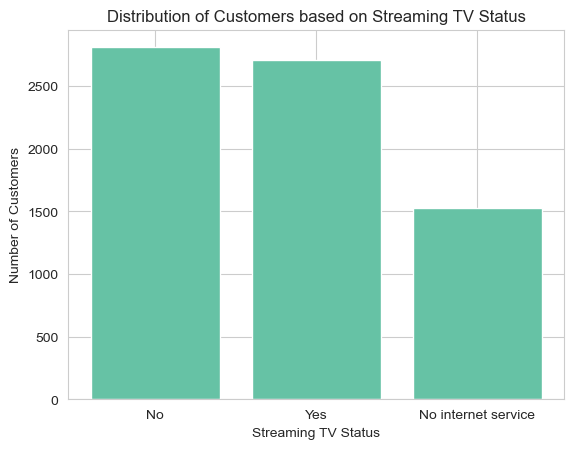

In [66]:
plt.bar(streaming_tv_counts.index, streaming_tv_counts.values)
plt.title("Distribution of Customers based on Streaming TV Status")
plt.xlabel("Streaming TV Status")
plt.ylabel("Number of Customers")
plt.show()

## Contract Terms:

### 1. What is the distribution of customers based on their contract term?


In [67]:
contract_counts = df['Contract'].value_counts()
print(contract_counts)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


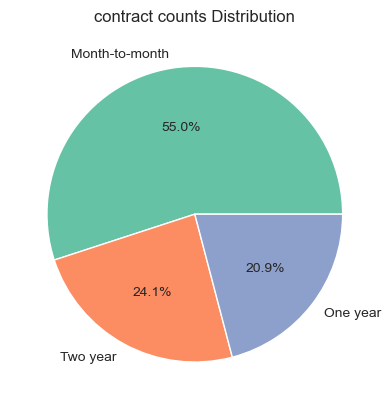

In [68]:
# Create a pie chart of the tech support status distribution
plt.pie(contract_counts.values, labels=contract_counts.index, autopct='%1.1f%%')
plt.title("contract counts Distribution")
plt.show()

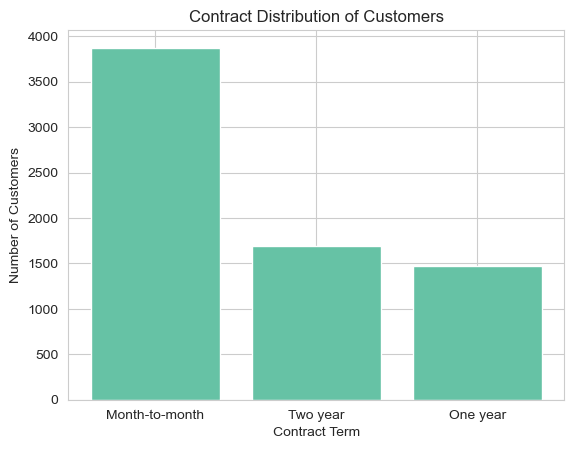

In [69]:
# Count the number of customers by contract term
contract_counts = df["Contract"].value_counts()

# Visualize the contract distribution as a bar plot
plt.bar(contract_counts.index, contract_counts.values)
plt.title("Contract Distribution of Customers")
plt.xlabel("Contract Term")
plt.ylabel("Number of Customers")
plt.show()

### 2. Is there a relationship between contract term and customer churn?

In [70]:
# Group the data by contract term and calculate the churn rate for each group
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
churn_by_contract
# Filter the data to only show churned customers
#churn_by_contract = churn_by_contract[churn_by_contract['Churn'] == 'Yes']



Contract Churn    percent
0  Month-to-month    No  57.290323
1  Month-to-month   Yes  42.709677
2        One year    No  88.730482
3        One year   Yes  11.269518
4        Two year    No  97.168142
5        Two year   Yes   2.831858

### Filtering the percentage of customers who churned in each group.

In [71]:
# Filter the data to only show churned customers
churn_by_contract = churn_by_contract[churn_by_contract['Churn'] == 'Yes']
churn_by_contract

Contract Churn    percent
1  Month-to-month   Yes  42.709677
3        One year   Yes  11.269518
5        Two year   Yes   2.831858

Yes here is a relationship between contract term and customer churn. Generally, customers with longer contract terms are less likely to churn compared to those with shorter contract terms. This is because longer-term contracts often come with benefits such as lower monthly fees or discounts on equipment, which can make it more costly for a customer to switch providers.

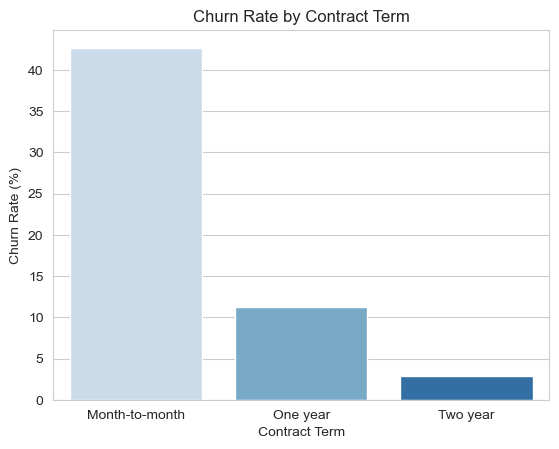

In [72]:
# Plot the churn rate by contract term
sns.barplot(x='Contract', y='percent', data=churn_by_contract, palette='Blues')
plt.title('Churn Rate by Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Churn Rate (%)')
plt.show()

## Payment Method:

### 1. What is the distribution of customers based on their payment method?

In [73]:
# Count the number of customers for each payment method
payment_counts = df["PaymentMethod"].value_counts()

# Print the payment counts
print(payment_counts)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


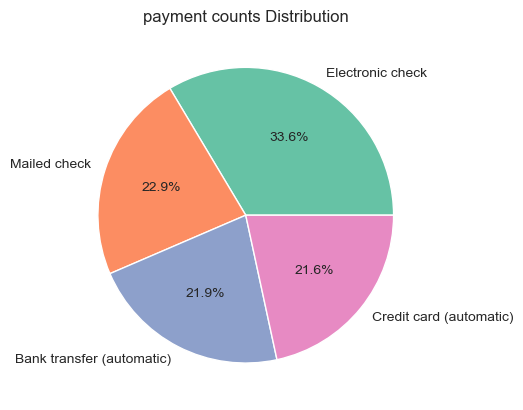

In [74]:
# Create a pie chart of the payment_counts distribution
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
plt.title("payment counts Distribution")
plt.show()

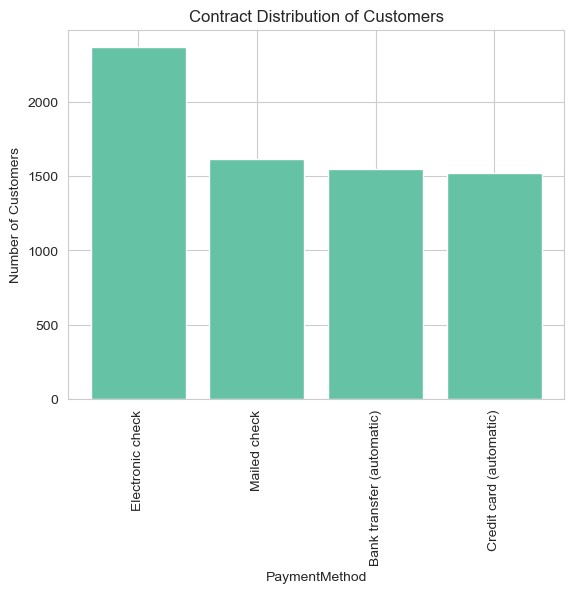

In [75]:
# Visualize the contract distribution as a bar plot
plt.bar(payment_counts.index, payment_counts.values)
plt.title("Contract Distribution of Customers")
plt.xlabel("PaymentMethod")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

### 2. Is there a relationship between payment method and customer churn?

To investigate if there is a relationship between payment method and customer churn, we can calculate the churn rate for customers with different payment methods and compare the results

In [76]:
# Calculate the churn rate for customers with different payment methods
payment_churn = df.groupby(['PaymentMethod', 'Churn'])['customerID'].count().unstack()
payment_churn

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308

In [77]:
# Calculate the churn rate for customers with different payment methods
payment_churn = df.groupby(['PaymentMethod', 'Churn'])['customerID'].count().unstack()
payment_churn

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308

In [78]:
# Normalize the counts to get the churn rate
payment_churn_rate = payment_churn.apply(lambda x: x/x.sum(), axis=1)
payment_churn_rate

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067

In [79]:
# calculate the sum of each row
payment_churn_sum = payment_churn.sum(axis=1)
payment_churn_sum

PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
dtype: int64

In [80]:
# divide each row by its sum to get the churn rate
payment_churn_rate = payment_churn.apply(lambda x: x / payment_churn_sum, axis=0)
payment_churn_rate

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067

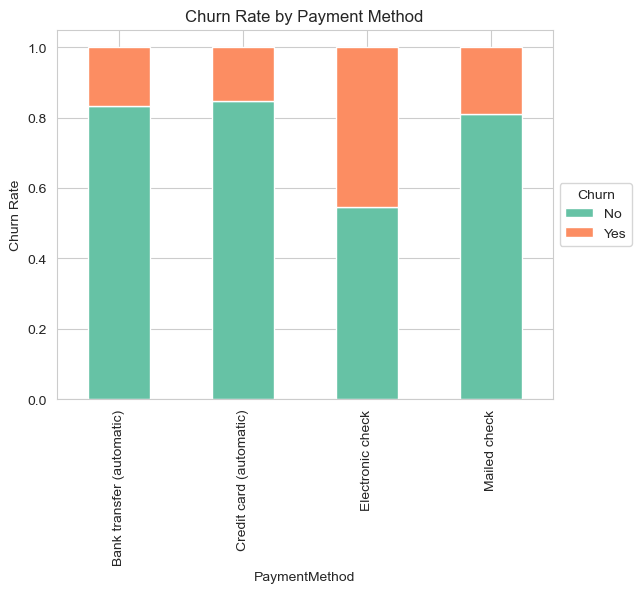

In [81]:
payment_churn_rate.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Payment Method')
plt.xlabel('PaymentMethod')
plt.ylabel('Churn Rate')
plt.legend(title='Churn', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.show()

In [82]:
target_instance = df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

In [83]:
# Defining the histogram plotting function
def hist(feature):
    group_df = df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

### Monthly Charges:

#### 1.Is there a relationship between monthly charges and customer churn?

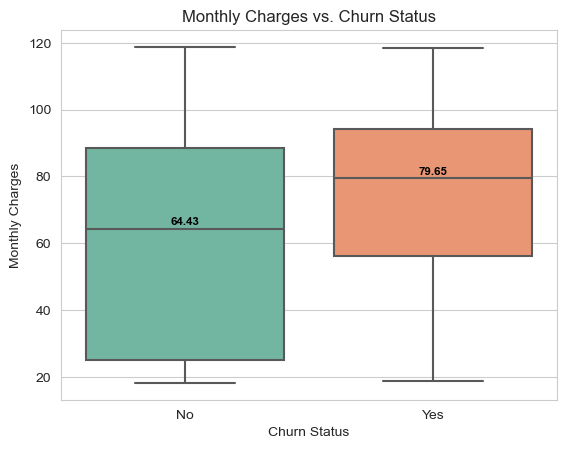

In [84]:
# Extract the "MonthlyCharges" and "Churn" columns
monthly_charges = df["MonthlyCharges"]
churn = df["Churn"]

# Create a boxplot of monthly charges for customers who have churned and those who have not
sns.boxplot(x=churn, y=monthly_charges)

# Set the title and axis labels
plt.title("Monthly Charges vs. Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges")

# Add statistical values (median and interquartile range) to the plot
medians = df.groupby('Churn')['MonthlyCharges'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick, label in zip(pos, plt.gca().get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 1, median_labels[tick], 
             horizontalalignment='center', size='small', color='k', weight='semibold')
    
plt.show()


The median monthly charges for customers who did not churn is 64.43, which means that half of the customers who did not churn had a monthly charge of less than or equal to 64.43, while the other half had a monthly charge greater than 64.43.

On the other hand, the median monthly charges for customers who did churn is 79.65, which means that half of the customers who did churn had a monthly charge of less than or equal to 79.65, while the other half had a monthly charge greater than 79.65.

This suggests that customers who churned had a higher median monthly charge than those who did not churn. 

Based on the boxplot, it appears that customers who churn tend to have higher monthly charges compared to those who do not churn

The null hypothesis is that there is no significant difference between the means of the monthly charges for customers who have churned and customers who have not churned.

In [85]:
from scipy.stats import ttest_ind

# Extract the monthly charges for customers who have churned
churned_monthly_charges = df[df["Churn"] == "Yes"]["MonthlyCharges"]

# Extract the monthly charges for customers who have not churned
not_churned_monthly_charges = df[df["Churn"] == "No"]["MonthlyCharges"]

# Perform a t-test to compare the means
t_stat, p_value = ttest_ind(churned_monthly_charges, not_churned_monthly_charges)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 16.536738015936308
p-value: 2.7066456068884154e-60


The p-value of 2.7066456068884154e-60 is a very small number, which indicates strong evidence against the null hypothesis. In this case, the null hypothesis is that there is no relationship between monthly charges and customer churn. The small p-value suggests that we should reject the null hypothesis and conclude that there is a statistically significant relationship between monthly charges and customer churn.

## Churn rate:

### 1. Which gender has a higher churn rate?

In [86]:
churn_rate_by_gender = churn_data.groupby('gender')['Churn'].value_counts(normalize=True)
print(churn_rate_by_gender)


gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: Churn, dtype: float64


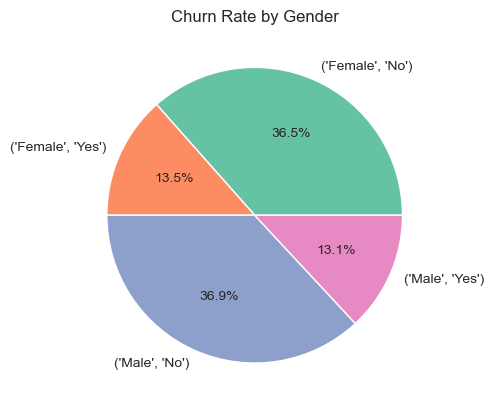

In [87]:
# Create a pie chart to show the churn rate by gender
plt.pie(churn_rate_by_gender, labels=churn_rate_by_gender.index, autopct='%1.1f%%')
plt.title('Churn Rate by Gender')
plt.show()

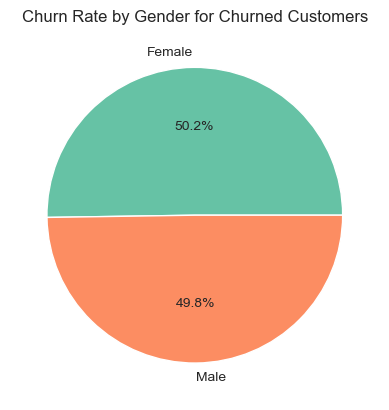

In [88]:
# Filter the churn data to include only those who churned
churned_data = churn_data[churn_data['Churn'] == 'Yes']

# Calculate the churn rate by gender for those who churned
churn_rate_by_gender_churned = churned_data.groupby('gender')['Churn'].count() / churned_data['Churn'].count()

# Create a pie chart to show the churn rate by gender for those who churned
plt.pie(churn_rate_by_gender_churned, labels=churn_rate_by_gender_churned.index, autopct='%1.1f%%')
plt.title('Churn Rate by Gender for Churned Customers')
plt.show()


### Is there a difference in churn rate between senior citizens and non-senior citizens? 

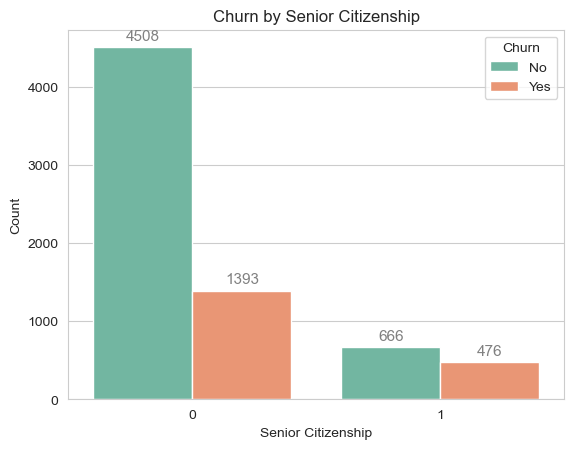

In [89]:
# Calculate the churn rate by senior citizenship
churn_rate_by_senior = churn_data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True)

# Create a countplot for Churn by Senior Citizenship
sns.countplot(x='SeniorCitizen', hue='Churn', data=churn_data)
plt.title('Churn by Senior Citizenship')
plt.xlabel('Senior Citizenship')
plt.ylabel('Count')

#Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                       textcoords='offset points')

plt.show()


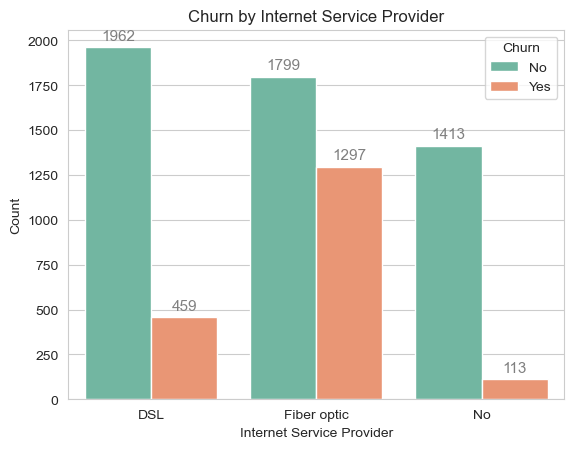

In [90]:
# Calculate the churn rate by internet service provider
churn_rate_by_provider = churn_data.groupby('InternetService')['Churn'].value_counts(normalize=True)

# Create a countplot for Churn by Internet Service Provider
sns.countplot(x='InternetService', hue='Churn', data=churn_data)
plt.title('Churn by Internet Service Provider')
plt.xlabel('Internet Service Provider')
plt.ylabel('Count')

#Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                       textcoords='offset points')

plt.show()


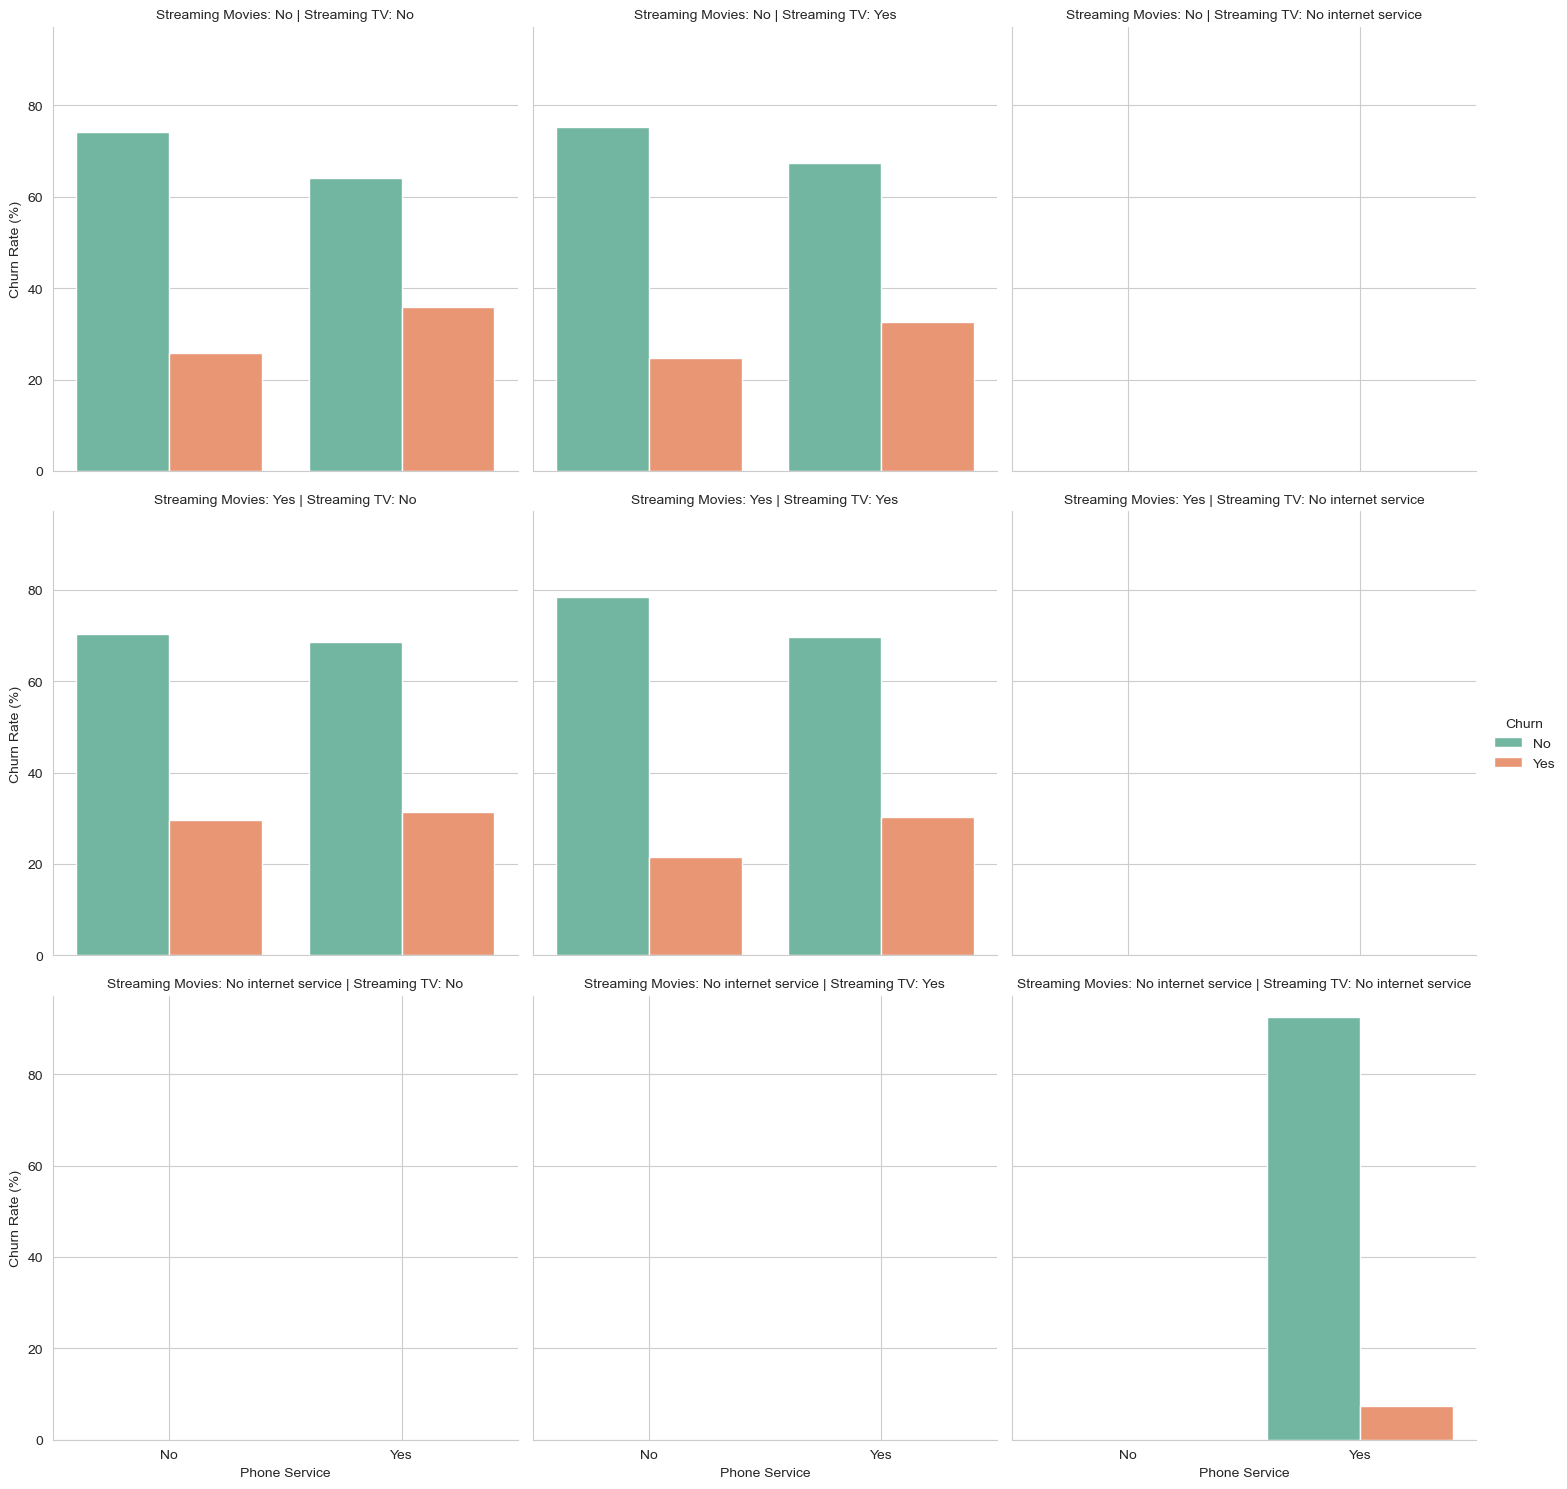

In [91]:
import seaborn as sns

# Calculate churn rate by whether the customer has additional services or not
churn_rate_by_services = churn_data.groupby(['PhoneService', 'StreamingTV', 'StreamingMovies'])['Churn'].value_counts(normalize=True).mul(100).reset_index(name='Churn_Rate')

# Create subplots for churn rate by additional services
g = sns.catplot(x='PhoneService', y='Churn_Rate', hue='Churn', col='StreamingTV', row='StreamingMovies', data=churn_rate_by_services, kind='bar', ci=None)

# Set titles for the subplots
g.set_titles(row_template = 'Streaming Movies: {row_name}', col_template = 'Streaming TV: {col_name}')

# Set labels for the axes
g.set_axis_labels('Phone Service', 'Churn Rate (%)')

# Show the plot
plt.show()


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [92]:
# Use pandas.DataFrame.drop_duplicates method

# Check for duplicate rows in churn_data
duplicate_rows = churn_data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


## Impute Missing Values

In [93]:
# Use sklearn.impute.SimpleImputer
# Check for missing values
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Features Encoding




In [94]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [95]:
churn_data.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No

RETENTION STRATEGIES 

To implement demographic segmentation, we will need to identify relevant demographic variables in the churn_data dataset and group customers based on these variables. 

In [96]:
# Group customers based on demographic variables
demographic_segments = churn_data.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents']).size().reset_index(name='count')

# Print the demographic segments and their corresponding customer counts
print(demographic_segments)


    gender  SeniorCitizen Partner Dependents  count
0   Female              0      No         No   1338
1   Female              0      No        Yes    142
2   Female              0     Yes         No    596
3   Female              0     Yes        Yes    844
4   Female              1      No         No    317
5   Female              1      No        Yes      3
6   Female              1     Yes         No    209
7   Female              1     Yes        Yes     39
8     Male              0      No         No   1381
9     Male              0      No        Yes    211
10    Male              0     Yes         No    567
11    Male              0     Yes        Yes    822
12    Male              1      No         No    244
13    Male              1      No        Yes      5
14    Male              1     Yes         No    281
15    Male              1     Yes        Yes     44


This groups customers based on their gender, SeniorCitizen status, partner status, and dependent status, and then calculates the count of customers in each group. 

In [97]:
# Filter the data to include only those who have churned
churned_data = churn_data[churn_data['Churn'] == 'Yes']

# Group the churned data by demographic variables
demographic_segments = churned_data.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents']).size().reset_index(name='count')

# Print the demographic segments and their corresponding customer counts
print(demographic_segments)


    gender  SeniorCitizen Partner Dependents  count
0   Female              0      No         No    429
1   Female              0      No        Yes     32
2   Female              0     Yes         No    114
3   Female              0     Yes        Yes    124
4   Female              1      No         No    158
5   Female              1      No        Yes      1
6   Female              1     Yes         No     73
7   Female              1     Yes        Yes      8
8     Male              0      No         No    418
9     Male              0      No        Yes     43
10    Male              0     Yes         No    128
11    Male              0     Yes        Yes    105
12    Male              1      No         No    118
13    Male              1      No        Yes      1
14    Male              1     Yes         No    105
15    Male              1     Yes        Yes     12


In [98]:
# Filter data to include only churned customers
churned_data = churn_data.loc[churn_data['Churn'] == 'Yes']

# Calculate total number of churned customers
total_churned = churned_data['Churn'].count()

# Group churned customers by demographic variables and calculate churn percentage
demographic_churn_perc = churned_data.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])['Churn'].count().reset_index(name='churn_count')
demographic_churn_perc['churn_perc'] = demographic_churn_perc['churn_count'] / total_churned * 100

# Sort demographic segments by churn percentage in descending order
demographic_churn_perc = demographic_churn_perc.sort_values('churn_perc', ascending=False)


# Print demographic segments and churn percentage
print(demographic_churn_perc)


    gender  SeniorCitizen Partner Dependents  churn_count  churn_perc
0   Female              0      No         No          429   22.953451
8     Male              0      No         No          418   22.364901
4   Female              1      No         No          158    8.453719
10    Male              0     Yes         No          128    6.848582
3   Female              0     Yes        Yes          124    6.634564
12    Male              1      No         No          118    6.313537
2   Female              0     Yes         No          114    6.099518
11    Male              0     Yes        Yes          105    5.617978
14    Male              1     Yes         No          105    5.617978
6   Female              1     Yes         No           73    3.905832
9     Male              0      No        Yes           43    2.300696
1   Female              0      No        Yes           32    1.712146
15    Male              1     Yes        Yes           12    0.642055
7   Female          

Based on this data, here are some retention techniques that could be useful:

Offer loyalty rewards: Since the highest percentage of churned customers belong to the demographic of females with no partners or dependents and males with no partners or dependents, it may be worth offering these customers loyalty rewards such as discounts, freebies or personalized offers to incentivize them to stay.

Provide more personalized services: The demographic of females with partners but no dependents have a lower churn percentage than those without partners. Therefore, it may be worth offering more personalized services to these customers, such as tailored product recommendations, customized communications or dedicated support, to make them feel valued and increase their loyalty.

Create targeted campaigns: The demographic of males with partners but no dependents also have a lower churn percentage than those without partners. Therefore, creating targeted campaigns specifically for this group, such as offers for family plans, bundles or promotions that cater to their unique needs and interests, could be an effective retention strategy.

Improve communication channels: Since the demographic of females and males who are senior citizens have relatively high churn percentages, it may be worth improving communication channels such as phone, email or chat support to cater to their specific needs and ensure they receive the attention and assistance they require.

Enhance customer experience: Finally, focusing on improving the overall customer experience could help to reduce churn across all demographics. This could include simplifying processes, increasing transparency, providing helpful resources and creating a seamless, hassle-free experience for customers.





In [99]:
# Loop through the columns and print unique values
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    print(f"{col}: {churn_data[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']


In [100]:
print(churn_data['Churn'].unique())

['No' 'Yes']


In [101]:
# Define the demographic segments
demographic_segments = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Create a dictionary to store the retention strategies for each demographic segment
retention_strategies = {}

# Loop through each demographic segment
for segment in demographic_segments:
    
    # Group the data by the demographic segment and calculate the count of churned customers
    segment_data = churn_data.groupby(segment).agg({'Churn': 'count'})
    
    # Analyze the behavior patterns of each segment
    if segment == 'gender':
        if segment_data.loc['Female', 'Churn'] > segment_data.loc['Male', 'Churn']:
            retention_strategies[segment] = 'Develop female-focused marketing campaigns to increase retention'
        else:
            retention_strategies[segment] = 'Develop male-focused marketing campaigns to increase retention'
    
    if segment == 'SeniorCitizen':
        if segment_data.loc[0, 'Churn'] > segment_data.loc[1, 'Churn']:
            retention_strategies[segment] = 'Develop senior citizen-focused marketing campaigns to increase retention'
        else:
            retention_strategies[segment] = 'Develop non-senior citizen-focused marketing campaigns to increase retention'
            
    if segment == 'Partner':
        if segment_data.loc['No', 'Churn'] > segment_data.loc['Yes', 'Churn']:
            retention_strategies[segment] = 'Develop marketing campaigns to encourage more customers to sign up for a partner plan'
        else:
            retention_strategies[segment] = 'Develop marketing campaigns to promote the benefits of being a single customer'
            
    if segment == 'Dependents':
        if segment_data.loc['No', 'Churn'] > segment_data.loc['Yes', 'Churn']:
            retention_strategies[segment] = 'Develop marketing campaigns to promote the benefits of being a single customer'
        else:
            retention_strategies[segment] = 'Develop marketing campaigns to promote the benefits of having dependents on the plan'
            
# Print the retention strategies for each demographic segment
print(retention_strategies)


{'gender': 'Develop male-focused marketing campaigns to increase retention', 'SeniorCitizen': 'Develop senior citizen-focused marketing campaigns to increase retention', 'Partner': 'Develop marketing campaigns to encourage more customers to sign up for a partner plan', 'Dependents': 'Develop marketing campaigns to promote the benefits of being a single customer'}


In [102]:
# Create demographic segments
demographic_segments = churn_data.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents']).size().reset_index(name='count')

# Compute churn rate, retention rate, and ARPU for each segment
for i, segment in demographic_segments.iterrows():
    # Subset the data for the current segment
    segment_data = churn_data.loc[
        (churn_data['gender'] == segment['gender']) &
        (churn_data['SeniorCitizen'] == segment['SeniorCitizen']) &
        (churn_data['Partner'] == segment['Partner']) &
        (churn_data['Dependents'] == segment['Dependents'])
    ]
    
    # Compute the churn rate
    churn_count = segment_data[segment_data['Churn'] == 'Yes']['Churn'].count()
    total_count = segment_data['Churn'].count()
    churn_rate = churn_count / total_count
    
    # Compute the retention rate
    retention_rate = 1 - churn_rate
    
    # Compute the ARPU
    arpu = segment_data['MonthlyCharges'].mean()
    
    # Print the results
    print(f"Segment {i+1}:")
    print(f"Churn rate: {churn_rate:.2%}")
    print(f"Retention rate: {retention_rate:.2%}")
    print(f"ARPU: ${arpu:.2f}")
    print()


Segment 1:
Churn rate: 32.06%
Retention rate: 67.94%
ARPU: $61.30

Segment 2:
Churn rate: 22.54%
Retention rate: 77.46%
ARPU: $55.20

Segment 3:
Churn rate: 19.13%
Retention rate: 80.87%
ARPU: $69.96

Segment 4:
Churn rate: 14.69%
Retention rate: 85.31%
ARPU: $59.02

Segment 5:
Churn rate: 49.84%
Retention rate: 50.16%
ARPU: $78.36

Segment 6:
Churn rate: 33.33%
Retention rate: 66.67%
ARPU: $92.55

Segment 7:
Churn rate: 34.93%
Retention rate: 65.07%
ARPU: $85.16

Segment 8:
Churn rate: 20.51%
Retention rate: 79.49%
ARPU: $80.87

Segment 9:
Churn rate: 30.27%
Retention rate: 69.73%
ARPU: $58.98

Segment 10:
Churn rate: 20.38%
Retention rate: 79.62%
ARPU: $49.83

Segment 11:
Churn rate: 22.57%
Retention rate: 77.43%
ARPU: $73.53

Segment 12:
Churn rate: 12.77%
Retention rate: 87.23%
ARPU: $60.76

Segment 13:
Churn rate: 48.36%
Retention rate: 51.64%
ARPU: $74.90

Segment 14:
Churn rate: 20.00%
Retention rate: 80.00%
ARPU: $65.14

Segment 15:
Churn rate: 37.37%
Retention rate: 62.63%
ARP

Segment 1: This segment has a relatively high churn rate. To improve retention, the company could consider offering targeted promotions or discounts to these customers.

Segment 2: This segment has a lower churn rate than segment 1, but there is still room for improvement. The company could focus on improving customer service for these customers, such as offering personalized support or faster response times.

Segment 3: This segment has a relatively low churn rate, but the ARPU is higher than other segments. To retain these high-value customers, the company could consider offering exclusive or premium services or products.

Segment 4: This segment has a low churn rate and a relatively low ARPU. To retain these customers, the company could focus on providing value-added services or incentivizing them to upgrade to higher-priced plans.

Segment 5: This segment has a very high churn rate, indicating that these customers are not satisfied with the company's services. To improve retention, the company should investigate the reasons for dissatisfaction and work to address them.

Segment 6: This segment has a relatively high churn rate, but a high ARPU. To retain these customers, the company could offer exclusive or premium services, or personalized support to address any concerns they may have.

Segment 7: This segment has a high churn rate and a high ARPU. To improve retention, the company could offer targeted promotions or discounts to retain these high-value customers.

Segment 8: This segment has a relatively low churn rate and a high ARPU. To retain these high-value customers, the company could consider offering exclusive or premium services, or incentivizing them to upgrade to higher-priced plans.

Segment 9: This segment has a relatively high churn rate and a low ARPU. To retain these customers, the company could consider offering value-added services or personalized support to address any concerns they may have.

Segment 10: This segment has a relatively low churn rate and a low ARPU. To retain these customers, the company could consider offering promotions or discounts to encourage them to upgrade to higher-priced plans.

Segment 11: This segment has a lower churn rate than segment 2, but there is still room for improvement. The company could focus on improving customer service for these customers, such as offering personalized support or faster response times.

Segment 12: This segment has a very low churn rate, but a relatively low ARPU. To retain these customers, the company could consider offering value-added services or incentivizing them to upgrade to higher-priced plans.

Segment 13: This segment has a very high churn rate, indicating that these customers are not satisfied with the company's services. To improve retention, the company should investigate the reasons for dissatisfaction and work to address them.

Segment 14: This segment has a relatively low churn rate and a high ARPU. To retain these high-value customers, the company could consider offering exclusive or premium services, or incentivizing them to upgrade to higher-priced plans.

Segment 15: This segment has a high churn rate and a high ARPU. To improve retention, the company could offer targeted promotions or discounts to retain these high-value customers.

Segment 16: This segment has a relatively low churn rate and a high ARPU. To retain these high-value customers, the company could consider offering exclusive or premium services, or incentivizing them to upgrade to higher-priced plans.

In [103]:
for column in churn_data.columns:
    if churn_data[column].dtype == 'object':
        print(column)
        print(churn_data[column].unique())
        print()

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn
['No' 'Yes']



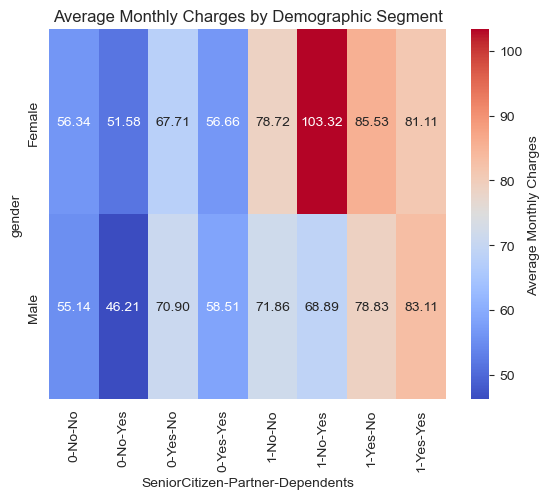

In [104]:
# Define the demographic segments
demographic_segments = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Filter for customers who didn't churn
df_no_churn = churn_data[churn_data['Churn'] == 'No']

# Compute the average monthly charges for each demographic segment
df_segment_charges = df_no_churn.groupby(demographic_segments)['MonthlyCharges'].mean().reset_index()

# Pivot the data to make it easier to visualize
df_segment_charges_pivot = df_segment_charges.pivot_table(index='gender', columns=['SeniorCitizen', 'Partner', 'Dependents'], values='MonthlyCharges')

# Plot the data as a heatmap
sns.set_style('whitegrid')
sns.heatmap(df_segment_charges_pivot, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Average Monthly Charges'})
plt.title('Average Monthly Charges by Demographic Segment')
plt.show()




In [105]:
print(df_segment_charges.head(5))

   gender  SeniorCitizen Partner Dependents  MonthlyCharges
0  Female              0      No         No       56.337184
1  Female              0      No        Yes       51.580909
2  Female              0     Yes         No       67.707158
3  Female              0     Yes        Yes       56.658889
4  Female              1      No         No       78.721384


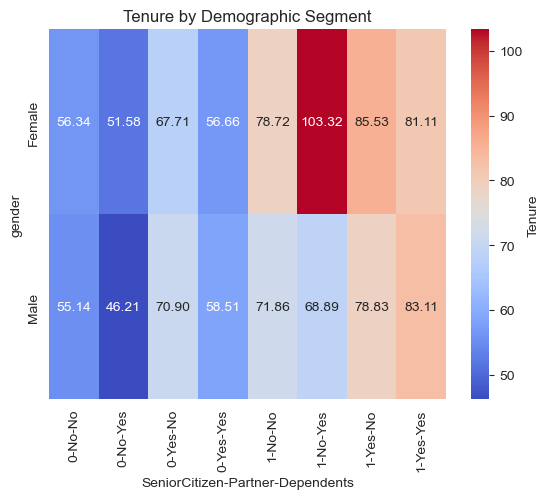

In [106]:
# Define the demographic segments
demographic_segments = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Filter for customers who didn't churn
df_no_churn = churn_data[churn_data['Churn'] == 'No']

# Compute the average monthly charges for each demographic segment
df_segment_tenure = df_no_churn.groupby(demographic_segments)['tenure'].mean().reset_index()

# Pivot the data to make it easier to visualize
df_segment_tenure_pivot = df_segment_tenure.pivot_table(index='gender', columns=['SeniorCitizen', 'Partner', 'Dependents'], values='tenure')

# Plot the data as a heatmap
sns.set_style('whitegrid')
sns.heatmap(df_segment_charges_pivot, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Tenure'})
plt.title('Tenure by Demographic Segment')
plt.show()


In [107]:
print(df_segment_tenure.head(5))

   gender  SeniorCitizen Partner Dependents     tenure
0  Female              0      No         No  28.196920
1  Female              0      No        Yes  24.618182
2  Female              0     Yes         No  47.470954
3  Female              0     Yes        Yes  43.670833
4  Female              1      No         No  34.358491


In [108]:
import numpy as np

def bin_column_by_range(df, col_name, num_bins, labels):
    # Get the minimum and maximum values of the column
    col_min = df[col_name].min()
    col_max = df[col_name].max()

    # Calculate the bin edges
    bin_edges = np.linspace(col_min, col_max, num_bins + 1)

    # Use the cut function to create a new categorical column
    df[col_name + '_binned'] = pd.cut(df[col_name], bins=bin_edges, labels=labels)

    # Return the updated DataFrame
    return df


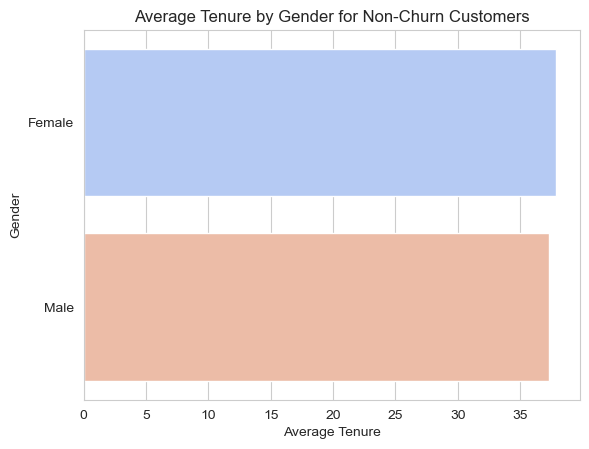

In [109]:
# Compute the average tenure by gender
df_gender_tenure = df_no_churn.groupby('gender')['tenure'].mean().reset_index()

# Create the barplot
sns.set_style('whitegrid')
sns.barplot(x='tenure', y='gender', data=df_gender_tenure, palette='coolwarm')
plt.xlabel('Average Tenure')
plt.ylabel('Gender')
plt.title('Average Tenure by Gender for Non-Churn Customers')
plt.show()


In [110]:
churn_data['MonthlyCharges'].isnull().sum()

0

In [111]:
# Calculate the mean of the 'MonthlyCharges' column
mean = churn_data['MonthlyCharges'].mean()

# Fill missing values with the mean
churn_data['MonthlyCharges'].fillna(mean, inplace=True)


In [112]:
# Define the number of bins and the labels
num_bins = 4
bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Call the function on the MonthlyCharges column
churn_data = bin_column_by_range(churn_data, 'MonthlyCharges', num_bins, bin_labels)

# Drop the original MonthlyCharges column
#churn_data = churn_data.drop('MonthlyCharges', axis=1)


In [113]:
#print(df['MonthlyCharges_binned'].unique())


In [114]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   customerID             7043 non-null   object  
 1   gender                 7043 non-null   object  
 2   SeniorCitizen          7043 non-null   int64   
 3   Partner                7043 non-null   object  
 4   Dependents             7043 non-null   object  
 5   tenure                 7043 non-null   int64   
 6   PhoneService           7043 non-null   object  
 7   MultipleLines          7043 non-null   object  
 8   InternetService        7043 non-null   object  
 9   OnlineSecurity         7043 non-null   object  
 10  OnlineBackup           7043 non-null   object  
 11  DeviceProtection       7043 non-null   object  
 12  TechSupport            7043 non-null   object  
 13  StreamingTV            7043 non-null   object  
 14  StreamingMovies        7043 non-null   o

### Implementing K-means Algorithm for customer segmentation 

In [115]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score


In [116]:
# Step 1: Drop customerID column
df = churn_data.drop(['Churn', 'customerID'], axis=1)


In [117]:

# Step 2: Split the data into categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns



In [118]:
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges_binned'],
      dtype='object')

In [119]:
# Step 3: Preprocess the categorical columns with OneHotEncoder
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = ct.fit_transform(df)



In [120]:
# Step 4: Standardize numerical columns
scaler = StandardScaler()
X[:, -3:] = scaler.fit_transform(X[:, -3:])



In [121]:
# Step 5: Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)



In [122]:
# Step 6: Run K-means algorithm on training set
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)


In [123]:
# Step 7: Evaluate K-means performance on training set
labels_train = kmeans.labels_
score_train = silhouette_score(X_train, labels_train)
print(f'Silhouette score on training set: {score_train}')




Silhouette score on training set: 0.2550018387419239


In [124]:
#pip install --upgrade threadpoolctl scikit-learn

In [125]:
# Step 8: Predict clusters for testing set
labels_test = kmeans.predict(X_test)


In [126]:
labels_test

array([1, 0, 0, ..., 0, 1, 1])

In [127]:
# Step 9: Evaluate K-means performance on testing set
score_test = silhouette_score(X_test, labels_test)
print(f'Silhouette score on testing set: {score_test}')


Silhouette score on testing set: 0.25502640089495


In [128]:
# Apply KMeans to test data and predict labels
y_kmeans_test = kmeans.predict(X_test)


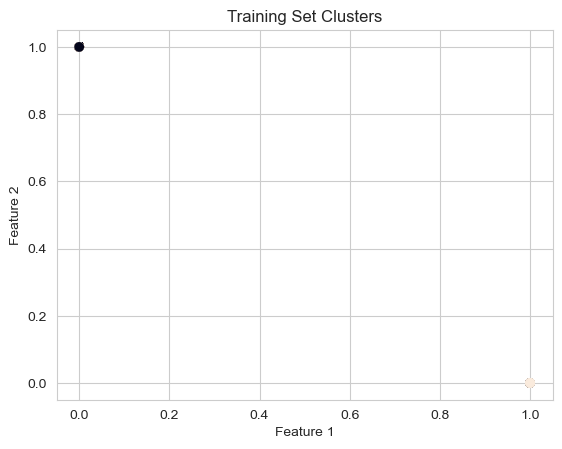

In [129]:
import matplotlib.pyplot as plt

# Step 10: Visualize clusters on training set
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels_train)
plt.title('Training Set Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


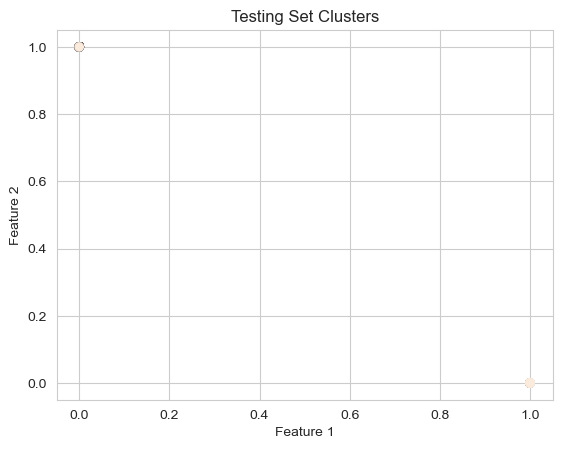

In [130]:

# Step 11: Visualize clusters on testing set
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_test)
plt.title('Testing Set Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


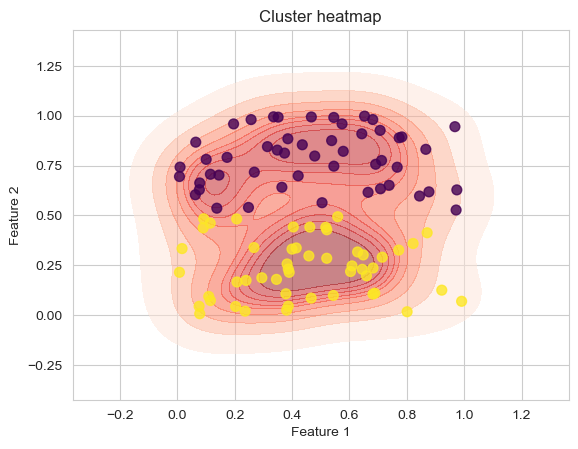

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some random data with 2 clusters
X = np.random.rand(100, 2)
y_kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)

# Plot the heatmap
sns.kdeplot(X[:, 0], X[:, 1], cmap="Reds", shade=True, bw_method='silverman', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster heatmap')
plt.show()


In [132]:
from sklearn.decomposition import PCA


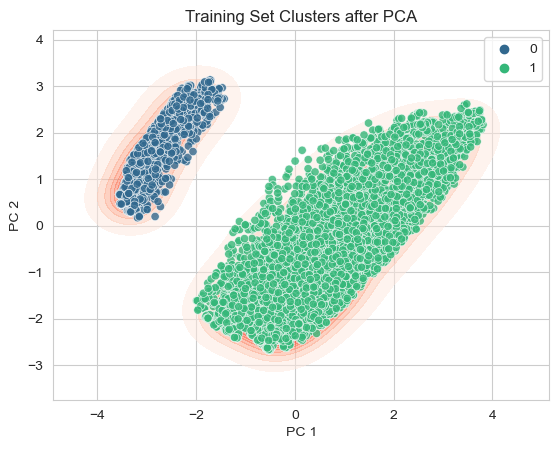

In [133]:
import seaborn as sns

# Step 10: Reduce data dimensionality with PCA
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)

# Step 11: Visualize clusters on training set after PCA using kdeplot
sns.kdeplot(X_train_pca[:, 0], X_train_pca[:, 1], cmap="Reds", shade=True, bw_method='silverman', alpha=0.5)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=labels_train, palette='viridis', alpha=0.8)
plt.title('Training Set Clusters after PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


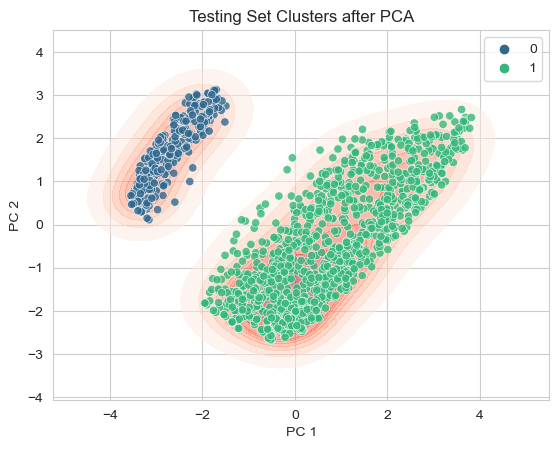

In [134]:
# Step 12: Reduce data dimensionality with PCA on testing set
X_test_pca = pca.transform(X_test)

# Step 13: Visualize clusters on testing set after PCA
sns.kdeplot(X_test_pca[:, 0], X_test_pca[:, 1], cmap="Reds", shade=True, bw_method='silverman', alpha=0.5)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=labels_test, palette='viridis', alpha=0.8)
plt.title('Testing Set Clusters after PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


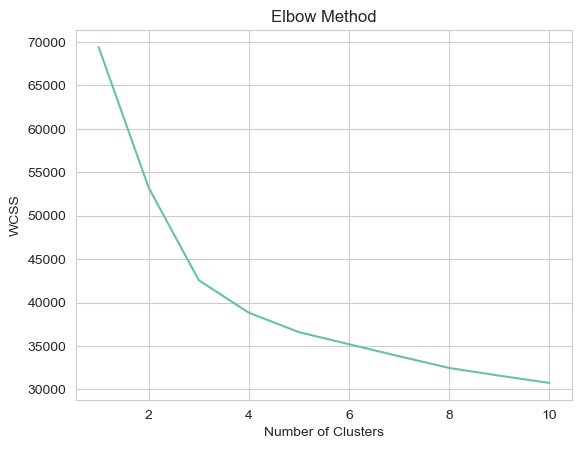

Optimal number of clusters: 10


In [135]:
import matplotlib.pyplot as plt

# Step 6: Run K-means algorithm on training set with a range of k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    wcss.append(kmeans.inertia_)

# Step 7: Plot the within-cluster sum of squares (WCSS) against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 8: Find the optimal number of clusters
optimal_k = wcss.index(min(wcss)) + 1
print(f'Optimal number of clusters: {optimal_k}')


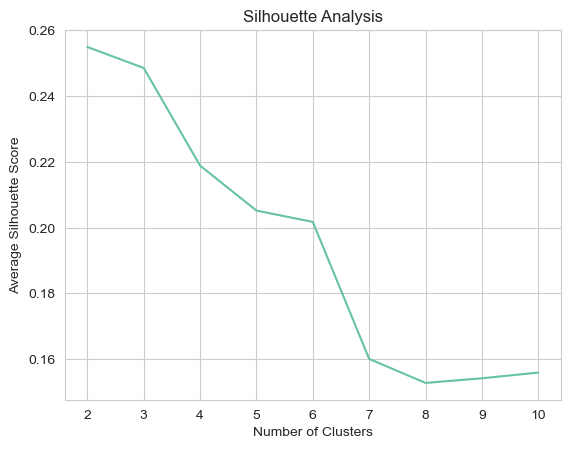

Optimal number of clusters: 2


In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Step 6: Run K-means algorithm on training set with a range of k values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train, labels))

# Step 7: Plot the average silhouette scores against the number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

# Step 8: Find the optimal number of clusters with the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + 2
print(f'Optimal number of clusters: {optimal_k}')


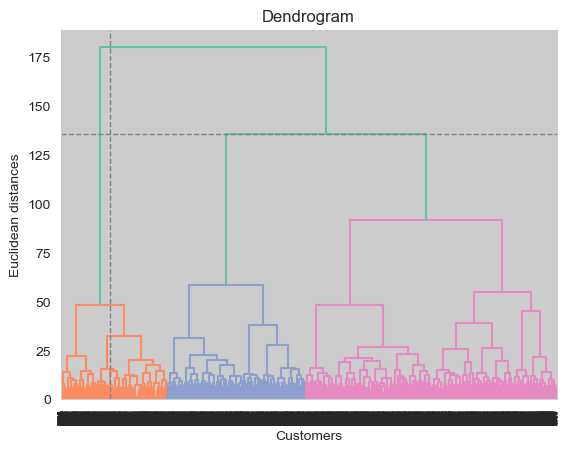

Optimal number of clusters: 16895


In [137]:
import scipy.cluster.hierarchy as sch

# Step 6: Perform hierarchical clustering on the training set
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))

# Step 7: Identify the optimal number of clusters
distances = dendrogram['dcoord']
dist_diff = np.diff(distances)
dist_diff = dist_diff[1:]
k = dist_diff.argmax() + 2

# Step 8: Plot the optimal number of clusters on the dendrogram
if k < len(distances):
    plt.axhline(y=distances[k-1].max(), c='grey', lw=1, linestyle='dashed')
    plt.axvline(x=k, c='grey', lw=1, linestyle='dashed')
else:
    plt.axhline(y=distances[-1][-1], c='grey', lw=1, linestyle='dashed')
    plt.axvline(x=len(distances)+1, c='grey', lw=1, linestyle='dashed')


plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

print(f'Optimal number of clusters: {k}')


In [138]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Set number of clusters
k = 10

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_train, kmeans.labels_)

# Print the index
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 2.0632175756739644


In [139]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Set number of clusters
k = 2

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_train, kmeans.labels_)

# Print the index
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 1.3059705447781147


## Dataset Splitting

In [140]:
# Use train_test_split with a random_state, and add stratify for Classification

## Features Scaling


In [141]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

## Optional: Train Dataset Balancing 

In [142]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

Logistic Regression: This is a common model for binary classification problems like churn prediction. It models the probability of a customer churning given their feature values.

Random Forest: This is an ensemble learning algorithm that creates multiple decision trees to predict the churn probability. It can handle a large number of features and is relatively easy to tune.

Gradient Boosting: This is another ensemble learning algorithm that builds trees in a sequential manner. It can provide better accuracy than random forests, but may require more tuning and can be more computationally expensive.

Support Vector Machines (SVM): SVMs can be used for binary classification problems like churn prediction. They try to find a hyperplane that best separates the churned and non-churned customers in the feature space.

Naive Bayes: Naive Bayes is a simple and fast model that can perform well on imbalanced datasets by using probability-based classification.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [143]:
# Code here

### Train the Model

In [144]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [145]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [146]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [147]:
# Code here

### Train the Model

In [148]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [149]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [150]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [151]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [152]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app